### Staregy number 1: MACD with rebalancing between different sectors each year. 

In [25]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import datetime
import numpy as np
from ta.trend import MACD

In [9]:
names_of_stocks = ['XLK', "XLE", "XLF", "XLV", "XLRE", "XLB", "XLY","XLP","XLU","XLI","IYZ"]

In [27]:
def MACD_indicator(df,balance):
    # Calculate the MACD indicator
    indicator_macd = MACD(df['Adj Close'])

    # Add the MACD line and signal line to the dataframe
    df['macd'] = indicator_macd.macd()
    df['signal'] = indicator_macd.macd_signal()

    # Plot the MACD line and signal line
#     plt.plot(df['macd'], label='MACD')
#     plt.plot(df['signal'], label='Signal Line')
#     plt.legend()
#     plt.show()
    trades = 0
    # Create a new column to track whether to buy or sell based on MACD
    df['macd_position'] = np.where(df['macd'] > df['signal'], 1, -1)

    # Create a new column to track the change in position
    df['macd_signal'] = df['macd_position'].diff()
    shares =0
    # Calculate the profit or loss based on the MACD strategy
    #macd_signal column contains values of 2 when the MACD line crosses above the signal line and values of -2 when the MACD line crosses below the signal line. 
    for i in range(1, len(df)):
        if df['macd_signal'].iloc[i] == 2:
            # Buy when MACD crosses above the signal line
            shares = balance / df['Adj Close'].iloc[i]
            trades +=1
        elif df['macd_signal'].iloc[i] == -2:
            # Sell when MACD crosses below the signal line
            balance = shares * df['Adj Close'].iloc[i]
            shares = 0
            trades +=1
    # Print the final balance
    return balance,trades

The code is a Python function that calculates the Moving Average Convergence Divergence (MACD) indicator for a given input dataframe df, and uses it to generate buy and sell signals for a trading strategy.
The MACD indicator is calculated using the MACD function, and the resulting MACD and signal lines are added as new columns to the input dataframe df.
The macd_position column is created to track whether to buy or sell based on MACD, and the macd_signal column is created to track the change in position.
The function then loops through each row of the dataframe and generates buy and sell signals based on the MACD strategy. When the MACD line crosses above the signal line, the function buys the stock by calculating the number of shares to buy based on the available balance. Similarly, when the MACD line crosses below the signal line, the function sells the stock and calculates the new balance based on the number of shares sold.
Finally, the function returns the final balance and the number of trades made during the MACD trading strategy.

In [28]:
total_balance=0;
balance=100000
previous_year_data = []

In [29]:
def next_year (num):
    start = datetime(num,1,1)
    end = datetime(num+1,1,1)
    if num == 2023:
            end = datetime.now().date()
    elif num == 2024:
        return
    data = yf.download(names_of_stocks ,start=start, end=end)
    new_data = data["Adj Close"]
    return new_data
# start = datetime(2010,1,1)
# end = datetime(2021,1,1)
# now = datetime.now().date()
# data = yf.download(names_of_stocks ,start=start, end=end)
# new_data = data["Adj Close"]
# new_data

In [30]:
num = 2010
new_data = next_year(num)
for i in names_of_stocks:
    sector_name = i
    data_sector = pd.DataFrame(new_data[sector_name ])
    df = data_sector.rename(columns={sector_name: 'Adj Close'})
    new_balance, trades = MACD_indicator(df,balance)
    total_balance  += new_balance
    print(f'Total profit/loss for sector {sector_name}', new_balance)
    previous_year_data.append({sector_name: new_balance})
print(previous_year_data)
print(f"\n Balance on the bank account:{total_balance}\n")
total_profit = total_balance-1100000
precent_growth = total_profit/1100000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1262322000, endDate = 1293858000
Total profit/loss for sector XLK 114009.8202256959
Total profit/loss for sector XLE 119018.18985238897
Total profit/loss for sector XLF 96369.03587954707
Total profit/loss for sector XLV 100105.58509079732
Total profit/loss for sector XLRE 100000
Total profit/loss for sector XLB 101318.45772824022
Total profit/loss for sector XLY 108558.36195775704
Total profit/loss for sector XLP 103423.79494498603
Total profit/loss for sector XLU 100301.20181342178
Total profit/loss for sector XLI 110541.08862332228
Total profit/loss for sector IYZ 108841.24467824775
[{'XLK': 114009.8202256959}, {'XLE': 119018.18985238897}, {'XLF': 96369.03587954707}, {'XLV': 100105.58509079732}, {'XLRE': 100000}, {'XLB': 101318.45772824022}, {'XLY': 108558.36195775704}, {'XLP': 103423.79494498603}, {'XLU': 100301.20181342178}, {'XLI': 110541.0886233222

This code initializes a variable num with a value of 2010, and then calls a function next_year(num) to generate a new dataset for the next year.
Then, it loops through a list new_list, where each element of the list represents a sector name. Inside the loop, the code extracts the data for the current sector from the new dataset using the sector_name variable, creates a pandas DataFrame with the extracted data, renames the column to 'Adj Close', and passes this DataFrame along with the current balance to the MACD_indicator() function. The MACD_indicator() function calculates the total profit or loss and the number of trades made using the MACD trading strategy and returns these values as new_balance and trades.
The total_balance variable is then updated with the new_balance for the current sector, and the previous_year_data list is updated with a dictionary containing the sector name and its new_balance.
Finally, the code prints out the previous_year_data list, the total balance in the bank account after trading, the total profit or loss, and the return percentage.
Overall, it seems that the code is executing a trading strategy based on the MACD indicator for multiple sectors and generating the total profit or loss and return percentage.

The last two lines of code calculate the total profit made by subtracting the initial balance of 1,100,000 from the total balance on the bank account and then calculates the percentage return on investment.

In [31]:
def change_investment(total_balance):
# Define the initial investment in each sector
    initial_investment = total_balance

    # Calculate the total profit/loss for the previous year
    total_profit_loss = sum([list(d.values())[0] for d in previous_year_data])

    # Calculate the proportional profit/loss for each sector
    proportional_profit_loss = {k: v/total_profit_loss for d in previous_year_data for k, v in d.items()}

    # Calculate the new investment amounts based on the proportional profit/loss
    new_investments = {k: v*initial_investment for k, v in proportional_profit_loss.items()}

    # Print the new investment amounts
    return new_investments

This function calculates the new investment amounts for each sector based on the total balance and the proportional profit/loss from the previous year.
First, the initial investment amount is set to be the same as the total balance. Then, the function sums up the profit/loss values for each sector from the previous year to get the total profit/loss.
Next, the function calculates the proportional profit/loss for each sector by dividing each sector's profit/loss from the previous year by the total profit/loss. This gives a percentage value that represents each sector's contribution to the total profit/loss.
Finally, the function calculates the new investment amounts for each sector by multiplying the proportional profit/loss values by the initial investment amount. The result is a dictionary that maps each sector name to its corresponding new investment amount.
The function then returns this dictionary of new investment amounts.

In [32]:
def invest_new_year(new_data,new_investments,new_list):
    global total_balance
    for i in new_list:
        sector_name = i
        print(i)
        data_sector = pd.DataFrame(new_data[sector_name ])
        df = data_sector.rename(columns={sector_name: 'Adj Close'})
        total_balance  -= new_investments[sector_name]
        new_balance, trades = MACD_indicator(df,new_investments[sector_name])
        total_balance  += new_balance
        print(f'Total profit/loss for sector {sector_name}', new_balance)
        new_investments[sector_name]=new_balance
    #     print(f"NUmber of trades {trades}")

    print(new_investments)
    print(f"/n Balance on the bank account:{total_balance} /n")
    total_profit = total_balance-1100000
    precent_growth = total_profit/1100000
    print(f"Total Profit:{total_profit}")
    print(f"Return percent:{precent_growth}")

This code defines a function called invest_new_year that takes in three arguments:
new_data: A dictionary containing financial data for various sectors.
new_investments: A dictionary containing the amount of money to invest in each sector.
new_list: A list of strings representing the names of sectors to invest in.
The function loops through each sector in new_list, retrieves the financial data for that sector from new_data, renames the relevant column to 'Adj Close', and uses this data along with the amount to invest in that sector from new_investments to calculate the profit/loss and number of trades using a MACD indicator. The function then updates the total_balance variable by subtracting the initial investment and adding the new profit/loss. It also updates the new_investments dictionary with the new profit/loss amount for that sector.
Finally, the function prints the updated new_investments dictionary, the current total_balance, the total profit, and the return percentage.

In [33]:
for i in range(12):
    print(num)
    num+=1
    new_data = next_year(num)
    new_investments = change_investment(total_balance)
    invest_new_year(new_data,new_investments,names_of_stocks) 

2010
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1293858000, endDate = 1325394000
XLK
Total profit/loss for sector XLK 114040.30945542852
XLE
Total profit/loss for sector XLE 114505.95557289993
XLF
Total profit/loss for sector XLF 75443.11559367443
XLV
Total profit/loss for sector XLV 101666.04290780795
XLRE
Total profit/loss for sector XLRE 100000.0
XLB
Total profit/loss for sector XLB 94436.84985575019
XLY
Total profit/loss for sector XLY 107001.85139536847
XLP
Total profit/loss for sector XLP 97809.75403084865
XLU
Total profit/loss for sector XLU 99471.81227409912
XLI
Total profit/loss for sector XLI 108173.05490681519
IYZ
Total profit/loss for sector IYZ 99154.61611484073
{'XLK': 114040.30945542852, 'XLE': 114505.95557289993, 'XLF': 75443.11559367443, 'XLV': 101666.04290780795, 'XLRE': 100000.0, 'XLB': 94436.84985575019, 'XLY': 107001.85139536847, 'XLP': 97809.75403084865, 'XLU': 99471.8122740

Total profit/loss for sector XLI 118551.08310796857
IYZ
Total profit/loss for sector IYZ 114396.01762533939
{'XLK': 115080.34405127545, 'XLE': 118279.92284868972, 'XLF': 97466.45467155575, 'XLV': 118484.17035034629, 'XLRE': 115272.25030815655, 'XLB': 100436.11310418075, 'XLY': 117234.86303104956, 'XLP': 111028.31397692498, 'XLU': 107720.19467276004, 'XLI': 118551.08310796857, 'IYZ': 114396.01762533939}
/n Balance on the bank account:1233949.7277482464 /n
Total Profit:133949.7277482464
Return percent:0.12177247977113309
2018
[*********************100%***********************]  11 of 11 completed
XLK
Total profit/loss for sector XLK 143546.09123065727
XLE
Total profit/loss for sector XLE 127956.20626719279
XLF
Total profit/loss for sector XLF 116399.52166449456
XLV
Total profit/loss for sector XLV 111233.04716815618
XLRE
Total profit/loss for sector XLRE 99479.1140182101
XLB
Total profit/loss for sector XLB 117181.93005308667
XLY
Total profit/loss for sector XLY 129526.7295135946
XLP
Tota

At the end of the 12 years, the bank account balance is 1,759,974, which is $1,759,974.70. 

The total profit is calculated as the difference between the final bank account balance and the initial investment of $1,100,000. 


Therefore, the total profit is $659,974.70 

The return percentage is calculated as the total profit divided by the initial investment, which is $1,100,000. Therefore, the return percentage is 0.5999769971444225 or approximately 60%.


#### Now let's use the same strategy but for 2019-now:

In [68]:
total_balance=0;
balance=100000
previous_year_data = []

In [69]:
num = 2019
new_data = next_year(num)
for i in names_of_stocks:
    sector_name = i
    data_sector = pd.DataFrame(new_data[sector_name ])
    df = data_sector.rename(columns={sector_name: 'Adj Close'})
    new_balance, trades = MACD_indicator(df,balance)
    total_balance  += new_balance
    print(f'Total profit/loss for sector {sector_name}', new_balance)
    previous_year_data.append({sector_name: new_balance})
print(previous_year_data)
print(f"\n Balance on the bank account:{total_balance}\n")
total_profit = total_balance-1100000
precent_growth = total_profit/1100000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

[*********************100%***********************]  11 of 11 completed
Total profit/loss for sector XLK 118615.06361654235
Total profit/loss for sector XLE 101283.45077754465
Total profit/loss for sector XLF 113790.04351267045
Total profit/loss for sector XLV 104680.50393673423
Total profit/loss for sector XLRE 93717.82210367749
Total profit/loss for sector XLB 108958.89459596618
Total profit/loss for sector XLY 112405.24822038526
Total profit/loss for sector XLP 95750.42288194051
Total profit/loss for sector XLU 99759.92317907688
Total profit/loss for sector XLI 105619.3685245332
Total profit/loss for sector IYZ 105360.62187617527
[{'XLK': 118615.06361654235}, {'XLE': 101283.45077754465}, {'XLF': 113790.04351267045}, {'XLV': 104680.50393673423}, {'XLRE': 93717.82210367749}, {'XLB': 108958.89459596618}, {'XLY': 112405.24822038526}, {'XLP': 95750.42288194051}, {'XLU': 99759.92317907688}, {'XLI': 105619.3685245332}, {'IYZ': 105360.62187617527}]

 Balance on the bank account:1159941.36322

In [70]:
for i in range(5):
    print(num)
    num+=1
    new_data = next_year(num)
    print(new_data)
    new_investments = change_investment(total_balance)
    invest_new_year(new_data,new_investments,names_of_stocks) 
    if num == 2023:
        break

2019
[*********************100%***********************]  11 of 11 completed
                  IYZ        XLB        XLE        XLF        XLI         XLK  \
Date                                                                            
2020-01-02  27.479361  56.773338  51.505093  29.014107  78.589325   90.442810   
2020-01-03  27.332314  55.856735  51.352055  28.706041  78.437859   89.425949   
2020-01-06  27.369081  55.613556  51.751652  28.687370  78.466248   89.639008   
2020-01-07  27.295553  55.548077  51.615612  28.500664  78.305305   89.600258   
2020-01-08  27.405836  55.744495  50.765423  28.687370  78.570389   90.559029   
...               ...        ...        ...        ...        ...         ...   
2020-12-24  28.594357  68.426445  34.568089  27.727507  85.011200  126.559189   
2020-12-28  28.660593  68.158775  34.350449  27.861593  85.117462  127.990929   
2020-12-29  28.452427  67.996246  34.123745  27.765818  84.605469  127.382912   
2020-12-30  28.367270  68.933075 

Total profit/loss for sector IYZ 115486.47935755388
{'XLK': 132775.80418682148, 'XLE': 147433.4515517029, 'XLF': 148440.32647932076, 'XLV': 146562.6204970933, 'XLRE': 132711.52943654914, 'XLB': 147787.5148233875, 'XLY': 121485.17513342552, 'XLP': 140029.6196202417, 'XLU': 164448.48901337862, 'XLI': 161548.9909566705, 'IYZ': 115486.47935755388}
/n Balance on the bank account:1558710.0010561452 /n
Total Profit:458710.0010561452
Return percent:0.4170090918692229
2022
[*********************100%***********************]  11 of 11 completed
                  IYZ        XLB        XLE        XLF         XLI  \
Date                                                                 
2023-01-03  22.472975  77.263947  83.528259  34.150505   98.017845   
2023-01-04  22.800539  78.608101  83.518356  34.697788   98.884293   
2023-01-05  22.889875  77.363510  85.042458  34.439072   97.818665   
2023-01-06  23.406040  80.021957  86.655617  35.205273  100.497681   
2023-01-09  23.445745  80.529739  86.348

### From 2019 until now
### Balance on the bank account:1534973.9655847424
### Total Profit:434973.9655847424 
### Return percent:0.39543087780431124

## ----------------------------
#### from 2022 until now

In [71]:
total_balance=0;
balance=100000
previous_year_data = []

In [72]:
num = 2022
new_data = next_year(num)
for i in names_of_stocks:
    sector_name = i
    data_sector = pd.DataFrame(new_data[sector_name ])
    df = data_sector.rename(columns={sector_name: 'Adj Close'})
    new_balance, trades = MACD_indicator(df,balance)
    total_balance  += new_balance
    print(f'Total profit/loss for sector {sector_name}', new_balance)
    previous_year_data.append({sector_name: new_balance})
print(previous_year_data)
print(f"\n Balance on the bank account:{total_balance}\n")
total_profit = total_balance-1100000
precent_growth = total_profit/1100000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

[*********************100%***********************]  11 of 11 completed
Total profit/loss for sector XLK 87830.98373503893
Total profit/loss for sector XLE 114215.82543902853
Total profit/loss for sector XLF 102356.69717627708
Total profit/loss for sector XLV 109856.60871579479
Total profit/loss for sector XLRE 111110.5398103073
Total profit/loss for sector XLB 106425.01557214667
Total profit/loss for sector XLY 84801.89643988629
Total profit/loss for sector XLP 114748.73437013404
Total profit/loss for sector XLU 129342.8673358106
Total profit/loss for sector XLI 120013.28484407204
Total profit/loss for sector IYZ 86004.58769155803
[{'XLK': 87830.98373503893}, {'XLE': 114215.82543902853}, {'XLF': 102356.69717627708}, {'XLV': 109856.60871579479}, {'XLRE': 111110.5398103073}, {'XLB': 106425.01557214667}, {'XLY': 84801.89643988629}, {'XLP': 114748.73437013404}, {'XLU': 129342.8673358106}, {'XLI': 120013.28484407204}, {'IYZ': 86004.58769155803}]

 Balance on the bank account:1166707.0411300

In [73]:
for i in range(2):
    print(num)
    num+=1
    new_data = next_year(num)
    print(new_data)
    new_investments = change_investment(total_balance)
    invest_new_year(new_data,new_investments,names_of_stocks) 
    if num == 2023:
        break

2022
[*********************100%***********************]  11 of 11 completed
                  IYZ        XLB        XLE        XLF         XLI  \
Date                                                                 
2023-01-03  22.472975  77.263947  83.528259  34.150505   98.017845   
2023-01-04  22.800539  78.608101  83.518356  34.697788   98.884293   
2023-01-05  22.889875  77.363510  85.042458  34.439072   97.818665   
2023-01-06  23.406040  80.021957  86.655617  35.205273  100.497681   
2023-01-09  23.445745  80.529739  86.348824  35.075912  100.049515   
2023-01-10  23.664122  81.336235  86.962418  35.274925  100.597267   
2023-01-11  23.793161  82.610695  87.229630  35.603294  101.563309   
2023-01-12  23.971834  82.919350  88.892273  35.672947  102.160851   
2023-01-13  23.981760  83.427139  89.020927  35.941616  102.041336   
2023-01-17  23.733604  82.590775  89.208969  35.702801  101.174889   
2023-01-18  23.356409  81.425842  87.576012  35.036110   99.272697   
2023-01-19  23

### From 2022 until now:
#### Balance on the bank account:1146531.97062164 
#### Total Profit:46531.970621640095
#### Return percent:0.04230179147421827

# ----------------------------------------------------------------------------------------------------------
# Staregy number 2 :Trend strategy

In [74]:
balance = 100000

In [75]:
def stock_strategy_trend(stock_data,balance):
    # Initialize variables to keep track of buy/sell state, prices, and profits
    position = None
    buy_price = None
    # Initialize variables to keep track of our profit and number of trades
    profit = 0
    trades = 0
    # Iterate through each row of stock_data
    for index, row in stock_data.iterrows():
        if index >= 3:  # Make sure there are at least 3 rows before current row
            # Check if price has gone up 5 days in a row
            if not position and all(stock_data.iloc[index-i]['Adj Close'] > stock_data.iloc[index-(i+1)]['Adj Close'] for i in range(5)): 
                position = 'buy'
                buy_price = row['Adj Close']
                number_of_stocks = balance/buy_price
            # Check if price has gone down 2 days in a row
            elif position == 'buy' and all(stock_data.iloc[index-i]['Adj Close'] < stock_data.iloc[index-(i+1)]['Adj Close'] for i in range(2)):
                position = None
                sell_price = row['Adj Close']
                profit += (sell_price - buy_price)
                trades += 1
                balance = number_of_stocks*sell_price
    total_profit = profit
    avg_profit = profit / trades if trades > 0 else 0 
    return balance

In [77]:
start = datetime(2010,1,1)
# end = datetime(2019,1,1)
now = datetime.now().date()
data = yf.download(names_of_stocks ,start=start, end=now)
new_data = data["Adj Close"]
new_data

[*********************100%***********************]  11 of 11 completed


,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2010-01-04,14.540118,25.488926,38.080162,9.385948,21.880186,19.150225,18.718462,NaN,19.481926,25.213634,25.227167
2010-01-05,14.632108,25.571341,38.390968,9.558455,21.957455,19.125534,18.725481,NaN,19.249996,24.966354,25.319670
2010-01-06,14.391536,26.005898,38.850700,9.577626,22.003807,18.911564,18.711445,NaN,19.362818,25.221617,25.353306
2010-01-07,14.334934,25.803612,38.792427,9.782084,22.243311,18.837503,18.711445,NaN,19.275064,25.309355,25.563530
2010-01-08,14.228799,26.163239,39.044968,9.724578,22.598717,18.960945,18.648275,NaN,19.256258,25.349237,25.555111
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,22.343933,76.730003,77.699997,31.170000,97.550003,143.529999,72.760002,36.360001,67.000000,126.959999,141.520004
2023-03-21,22.602016,77.660004,80.389999,31.959999,98.680000,144.690002,72.699997,36.150002,65.650002,127.730003,145.429993
2023-03-22,22.065998,76.279999,78.680000,31.219999,96.790001,143.250000,72.029999,34.830002,64.360001,125.800003,142.190002


In [79]:
total_balance=0;
for i in names_of_stocks:
    sector_name = i
    data_sector = pd.DataFrame(new_data[sector_name ])
    df = data_sector.rename(columns={sector_name: 'Adj Close'})
    df = df.reset_index()
    new_balance = stock_strategy_trend(df,balance)
    total_balance  += new_balance
    print(f'Total profit/loss for sector {sector_name}', new_balance)
print(f"Balance on the bank account:{total_balance}")
total_profit = total_balance-1100000
precent_growth = total_profit/1100000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

Total profit/loss for sector XLK 129184.35013354228
Total profit/loss for sector XLE 122112.74501339263
Total profit/loss for sector XLF 114474.38720503634
Total profit/loss for sector XLV 92886.17569191918
Total profit/loss for sector XLRE 69972.73500203852
Total profit/loss for sector XLB 101634.80454483097
Total profit/loss for sector XLY 148764.89897652052
Total profit/loss for sector XLP 104707.52590141795
Total profit/loss for sector XLU 88012.12621285475
Total profit/loss for sector XLI 93196.16419413638
Total profit/loss for sector IYZ 130236.5141614273
Balance on the bank account:1195182.4270371166
Total Profit:95182.4270371166
Return percent:0.08652947912465146


In [81]:
start = datetime(2019,1,1)
# end = datetime(2019,1,1)
now = datetime.now().date()
data = yf.download(names_of_stocks ,start=start, end=now)
new_data = data["Adj Close"]
new_data

[*********************100%***********************]  11 of 11 completed


,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2019-01-02,23.824303,46.518021,46.582321,21.971964,60.058708,59.279896,45.212460,26.417648,45.510166,79.129662,95.620476
2019-01-03,23.456400,45.198875,46.120331,21.478008,58.231159,56.288174,44.952717,26.539751,45.501423,77.522949,93.550110
2019-01-04,24.174271,46.976059,47.689529,22.191500,60.439064,58.782856,45.911064,26.810114,46.175194,79.835518,96.646080
2019-01-07,24.515259,47.140961,48.398449,22.218946,60.930744,59.308563,45.848366,27.036879,45.860180,80.142014,98.831467
2019-01-08,24.892139,47.635639,48.772839,22.237232,61.765640,59.805584,46.269329,27.507843,46.428951,80.764282,99.924164
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,22.343933,76.730003,77.699997,31.170000,97.550003,143.529999,72.760002,36.360001,67.000000,126.959999,141.520004
2023-03-21,22.602016,77.660004,80.389999,31.959999,98.680000,144.690002,72.699997,36.150002,65.650002,127.730003,145.429993
2023-03-22,22.065998,76.279999,78.680000,31.219999,96.790001,143.250000,72.029999,34.830002,64.360001,125.800003,142.190002


In [83]:
total_balance=0;
for i in names_of_stocks:
    sector_name = i
    data_sector = pd.DataFrame(new_data[sector_name ])
    df = data_sector.rename(columns={sector_name: 'Adj Close'})
    df = df.reset_index()
    new_balance = stock_strategy_trend(df,balance)
    total_balance  += new_balance
    print(f'Total profit/loss for sector {sector_name}', new_balance)
print(f"Balance on the bank account:{total_balance}")
total_profit = total_balance-1100000
precent_growth = total_profit/1100000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

Total profit/loss for sector XLK 93236.76387056238
Total profit/loss for sector XLE 113456.34716574868
Total profit/loss for sector XLF 101882.76745599239
Total profit/loss for sector XLV 94371.1167962402
Total profit/loss for sector XLRE 85191.67717918451
Total profit/loss for sector XLB 93363.14933472445
Total profit/loss for sector XLY 110299.6383438031
Total profit/loss for sector XLP 110219.1770405709
Total profit/loss for sector XLU 93219.17883131745
Total profit/loss for sector XLI 88757.49230428881
Total profit/loss for sector IYZ 87096.00859907143
Balance on the bank account:1071093.3169215044
Total Profit:-28906.683078495553
Return percent:-0.02627880279863232


In [84]:
start = datetime(2022,1,1)
# end = datetime(2019,1,1)
now = datetime.now().date()
data = yf.download(names_of_stocks ,start=start, end=now)
new_data = data["Adj Close"]
new_data

[*********************100%***********************]  11 of 11 completed


,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2022-01-03,32.169991,87.039558,54.312729,38.528179,102.724968,173.429886,74.789055,49.259628,68.304413,136.773376,207.859497
2022-01-04,31.975901,88.110153,56.192123,39.541824,104.790436,171.592010,75.293457,49.067688,68.092369,134.968582,206.594406
2022-01-05,31.597433,88.100410,56.182625,39.083733,103.791954,166.315613,75.225555,47.474651,68.053810,134.007294,201.020126
2022-01-06,31.597433,86.990891,57.435562,39.658783,104.271614,165.475739,75.021851,47.532223,67.350243,132.457504,200.496277
2022-01-07,31.568321,86.913025,58.223396,40.126614,104.242249,163.954056,75.099449,47.282711,67.861061,131.780716,197.155655
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,22.343933,76.730003,77.699997,31.170000,97.550003,143.529999,72.760002,36.360001,67.000000,126.959999,141.520004
2023-03-21,22.602016,77.660004,80.389999,31.959999,98.680000,144.690002,72.699997,36.150002,65.650002,127.730003,145.429993
2023-03-22,22.065998,76.279999,78.680000,31.219999,96.790001,143.250000,72.029999,34.830002,64.360001,125.800003,142.190002


In [85]:
total_balance=0;
for i in names_of_stocks:
    sector_name = i
    data_sector = pd.DataFrame(new_data[sector_name ])
    df = data_sector.rename(columns={sector_name: 'Adj Close'})
    df = df.reset_index()
    new_balance = stock_strategy_trend(df,balance)
    total_balance  += new_balance
    print(f'Total profit/loss for sector {sector_name}', new_balance)
print(f"Balance on the bank account:{total_balance}")
total_profit = total_balance-1100000
precent_growth = total_profit/1100000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

Total profit/loss for sector XLK 95600.96183436815
Total profit/loss for sector XLE 103538.87150887541
Total profit/loss for sector XLF 98864.51945027297
Total profit/loss for sector XLV 95521.12027155203
Total profit/loss for sector XLRE 99440.63286353623
Total profit/loss for sector XLB 96859.31683494372
Total profit/loss for sector XLY 96637.27028118868
Total profit/loss for sector XLP 105481.14640526818
Total profit/loss for sector XLU 108909.66711242688
Total profit/loss for sector XLI 93120.52410962693
Total profit/loss for sector IYZ 90946.28546008244
Balance on the bank account:1084920.3161321415
Total Profit:-15079.68386785849
Return percent:-0.01370880351623499


# Goes up for 10 days:

In [107]:
def stock_strategy_trend__modified(stock_data, balance):
    # Initialize variables to keep track of buy/sell state, prices, and profits
    position = None
    buy_price = None
    # Initialize variables to keep track of our profit and number of trades
    profit = 0
    trades = 0
    # Iterate through each row of stock_data
    for index, row in stock_data.iterrows():
        if index >= 8:  # Make sure there are at least 8 rows before current row
            # Check if price has gone down 5 days in a row
            if not position and all(stock_data.iloc[index-i]['Adj Close'] < stock_data.iloc[index-(i+1)]['Adj Close'] for i in range(5)): 
                # Check if price has gone up 3 days in a row
                if all(stock_data.iloc[index-i]['Adj Close'] < stock_data.iloc[index-(i+1)]['Adj Close'] for i in range(3)):
                    position = 'buy'
                    buy_price = row['Adj Close']
                    number_of_stocks = balance/buy_price
            # Check if price has gone up 2 days in a row
            elif position == 'buy' and all(stock_data.iloc[index-i]['Adj Close'] > stock_data.iloc[index-(i+1)]['Adj Close'] for i in range(6)):
                position = None
                sell_price = row['Adj Close']
                profit += (sell_price - buy_price)
                trades += 1
                balance = number_of_stocks*sell_price
    total_profit = profit
    avg_profit = profit / trades if trades > 0 else 0 
    return balance


In [108]:
start = datetime(2010,1,1)
# end = datetime(2019,1,1)
now = datetime.now().date()
data = yf.download(names_of_stocks ,start=start, end=now)
new_data = data["Adj Close"]
new_data

[*********************100%***********************]  11 of 11 completed


,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2010-01-04,14.540126,25.488934,38.080170,9.385943,21.880188,19.150223,18.718458,NaN,19.481924,25.213636,25.227161
2010-01-05,14.632107,25.571344,38.390965,9.558460,21.957455,19.125538,18.725487,NaN,19.249994,24.966366,25.319662
2010-01-06,14.391541,26.005896,38.850697,9.577626,22.003801,18.911562,18.711449,NaN,19.362822,25.221617,25.353298
2010-01-07,14.334937,25.803602,38.792431,9.782084,22.243311,18.837500,18.711449,NaN,19.275059,25.309359,25.563528
2010-01-08,14.228801,26.163240,39.044971,9.724581,22.598709,18.960945,18.648283,NaN,19.256262,25.349241,25.555117
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,22.343933,76.730003,77.699997,31.170000,97.550003,143.529999,72.760002,36.360001,67.000000,126.959999,141.520004
2023-03-21,22.602016,77.660004,80.389999,31.959999,98.680000,144.690002,72.699997,36.150002,65.650002,127.730003,145.429993
2023-03-22,22.065998,76.279999,78.680000,31.219999,96.790001,143.250000,72.029999,34.830002,64.360001,125.800003,142.190002


In [109]:
total_balance=0;
for i in names_of_stocks:
    sector_name = i
    data_sector = pd.DataFrame(new_data[sector_name ])
    df = data_sector.rename(columns={sector_name: 'Adj Close'})
    df = df.reset_index()
    new_balance = stock_strategy_trend__modified(df,balance)
    total_balance  += new_balance
    print(f'Total profit/loss for sector {sector_name}', new_balance)
print(f"Balance on the bank account:{total_balance}")
total_profit = total_balance-1100000
precent_growth = total_profit/1100000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

Total profit/loss for sector XLK 260823.26220360116
Total profit/loss for sector XLE 195689.81483295228
Total profit/loss for sector XLF 305490.29060964397
Total profit/loss for sector XLV 353943.43483614025
Total profit/loss for sector XLRE 122427.18151449833
Total profit/loss for sector XLB 164461.86716688678
Total profit/loss for sector XLY 215163.21364236742
Total profit/loss for sector XLP 209514.41617009937
Total profit/loss for sector XLU 179809.3165369666
Total profit/loss for sector XLI 178350.51313514265
Total profit/loss for sector IYZ 114486.80035471356
Balance on the bank account:2300160.1110030124
Total Profit:1200160.1110030124
Return percent:1.0910546463663748


In [110]:
start = datetime(2019,1,1)
# end = datetime(2019,1,1)
now = datetime.now().date()
data = yf.download(names_of_stocks ,start=start, end=now)
new_data = data["Adj Close"]
new_data

[*********************100%***********************]  11 of 11 completed


,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2019-01-02,23.824306,46.518032,46.582314,21.971966,60.058697,59.279888,45.212452,26.417648,45.510170,79.129677,95.620468
2019-01-03,23.456398,45.198883,46.120319,21.478004,58.231148,56.288170,44.952717,26.539749,45.501419,77.522926,93.550102
2019-01-04,24.174269,46.976059,47.689518,22.191502,60.439064,58.782860,45.911057,26.810120,46.175186,79.835510,96.646072
2019-01-07,24.515257,47.140953,48.398457,22.218943,60.930733,59.308567,45.848370,27.036879,45.860184,80.141998,98.831459
2019-01-08,24.892138,47.635628,48.772835,22.237236,61.765652,59.805595,46.269329,27.507847,46.428951,80.764282,99.924164
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,22.343933,76.730003,77.699997,31.170000,97.550003,143.529999,72.760002,36.360001,67.000000,126.959999,141.520004
2023-03-21,22.602016,77.660004,80.389999,31.959999,98.680000,144.690002,72.699997,36.150002,65.650002,127.730003,145.429993
2023-03-22,22.065998,76.279999,78.680000,31.219999,96.790001,143.250000,72.029999,34.830002,64.360001,125.800003,142.190002


In [111]:
total_balance=0;
for i in names_of_stocks:
    sector_name = i
    data_sector = pd.DataFrame(new_data[sector_name ])
    df = data_sector.rename(columns={sector_name: 'Adj Close'})
    df = df.reset_index()
    new_balance = stock_strategy_trend__modified(df,balance)
    total_balance  += new_balance
    print(f'Total profit/loss for sector {sector_name}', new_balance)
print(f"Balance on the bank account:{total_balance}")
total_profit = total_balance-1100000
precent_growth = total_profit/1100000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

Total profit/loss for sector XLK 143963.4897224824
Total profit/loss for sector XLE 153788.40761718867
Total profit/loss for sector XLF 137377.7667421055
Total profit/loss for sector XLV 143996.46709293572
Total profit/loss for sector XLRE 104929.33233092526
Total profit/loss for sector XLB 119331.97918917408
Total profit/loss for sector XLY 122107.29528795568
Total profit/loss for sector XLP 124438.0368422033
Total profit/loss for sector XLU 118381.26267928796
Total profit/loss for sector XLI 87033.98647400684
Total profit/loss for sector IYZ 78756.49315801564
Balance on the bank account:1334104.5171362811
Total Profit:234104.51713628112
Return percent:0.21282228830571012


In [112]:
start = datetime(2020,1,1)
# end = datetime(2019,1,1)
now = datetime.now().date()
data = yf.download(names_of_stocks ,start=start, end=now)
new_data = data["Adj Close"]
new_data

[*********************100%***********************]  11 of 11 completed


,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2020-01-02,27.479364,56.773335,51.505093,29.014105,78.589325,90.442825,57.498299,34.387211,57.583347,97.035103,123.291267
2020-01-03,27.332315,55.856739,51.352058,28.706039,78.437851,89.425957,57.406277,34.639130,57.700661,96.189522,122.242058
2020-01-06,27.369081,55.613552,51.751648,28.687370,78.466240,89.639008,57.525902,34.648117,57.754810,96.788086,122.582062
2020-01-07,27.295559,55.548077,51.615616,28.500666,78.305298,89.600273,57.084171,34.270245,57.673592,96.598053,122.387787
2020-01-08,27.405838,55.744492,50.765415,28.687370,78.570412,90.559036,57.295830,34.441189,57.646519,97.225128,122.756935
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,22.343933,76.730003,77.699997,31.170000,97.550003,143.529999,72.760002,36.360001,67.000000,126.959999,141.520004
2023-03-21,22.602016,77.660004,80.389999,31.959999,98.680000,144.690002,72.699997,36.150002,65.650002,127.730003,145.429993
2023-03-22,22.065998,76.279999,78.680000,31.219999,96.790001,143.250000,72.029999,34.830002,64.360001,125.800003,142.190002


In [113]:
total_balance=0;
for i in names_of_stocks:
    sector_name = i
    data_sector = pd.DataFrame(new_data[sector_name ])
    df = data_sector.rename(columns={sector_name: 'Adj Close'})
    df = df.reset_index()
    new_balance = stock_strategy_trend__modified(df,balance)
    total_balance  += new_balance
    print(f'Total profit/loss for sector {sector_name}', new_balance)
print(f"Balance on the bank account:{total_balance}")
total_profit = total_balance-1100000
precent_growth = total_profit/1100000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

Total profit/loss for sector XLK 111929.86619176572
Total profit/loss for sector XLE 144478.85063135848
Total profit/loss for sector XLF 114845.77379303385
Total profit/loss for sector XLV 134099.27872385507
Total profit/loss for sector XLRE 98598.89038029354
Total profit/loss for sector XLB 120261.46198884178
Total profit/loss for sector XLY 115558.71345121726
Total profit/loss for sector XLP 116920.72340557464
Total profit/loss for sector XLU 118381.26471841881
Total profit/loss for sector XLI 79870.29914146323
Total profit/loss for sector IYZ 80901.71456703667
Balance on the bank account:1235846.836992859
Total Profit:135846.8369928589
Return percent:0.12349712453896264


# Staregy number 3 : BollingerBands

In [203]:
start = datetime(2010,1,1)
now = datetime.now().date()
data = yf.download(names_of_stocks ,start=start, end=now)
new_data = data["Adj Close"]
new_data

[*********************100%***********************]  11 of 11 completed


,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2010-01-04,14.540122,25.488928,38.080158,9.385945,21.880184,19.150229,18.718470,NaN,19.481926,25.213640,25.227165
2010-01-05,14.632105,25.571341,38.390965,9.558458,21.957451,19.125542,18.725483,NaN,19.249992,24.966368,25.319670
2010-01-06,14.391537,26.005898,38.850700,9.577626,22.003805,18.911572,18.711451,NaN,19.362823,25.221615,25.353298
2010-01-07,14.334933,25.803610,38.792431,9.782086,22.243320,18.837502,18.711451,NaN,19.275063,25.309355,25.563530
2010-01-08,14.228802,26.163235,39.044964,9.724582,22.598715,18.960941,18.648279,NaN,19.256264,25.349239,25.555117
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,22.343933,76.730003,77.699997,31.170000,97.550003,143.529999,72.760002,36.360001,67.000000,126.959999,141.520004
2023-03-21,22.602016,77.660004,80.389999,31.959999,98.680000,144.690002,72.699997,36.150002,65.650002,127.730003,145.429993
2023-03-22,22.065998,76.279999,78.680000,31.219999,96.790001,143.250000,72.029999,34.830002,64.360001,125.800003,142.190002


In [204]:
data_xle = pd.DataFrame(new_data["XLE"])
df = data_xle.rename(columns={'XLE': 'Adj Close'})
df.head(10)

,Adj Close
Date,
2010-01-04,38.080158
2010-01-05,38.390965
2010-01-06,38.850700
2010-01-07,38.792431
2010-01-08,39.044964
2010-01-11,38.993164
2010-01-12,38.429817
2010-01-13,38.572281
2010-01-14,38.682354


In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.volatility import BollingerBands

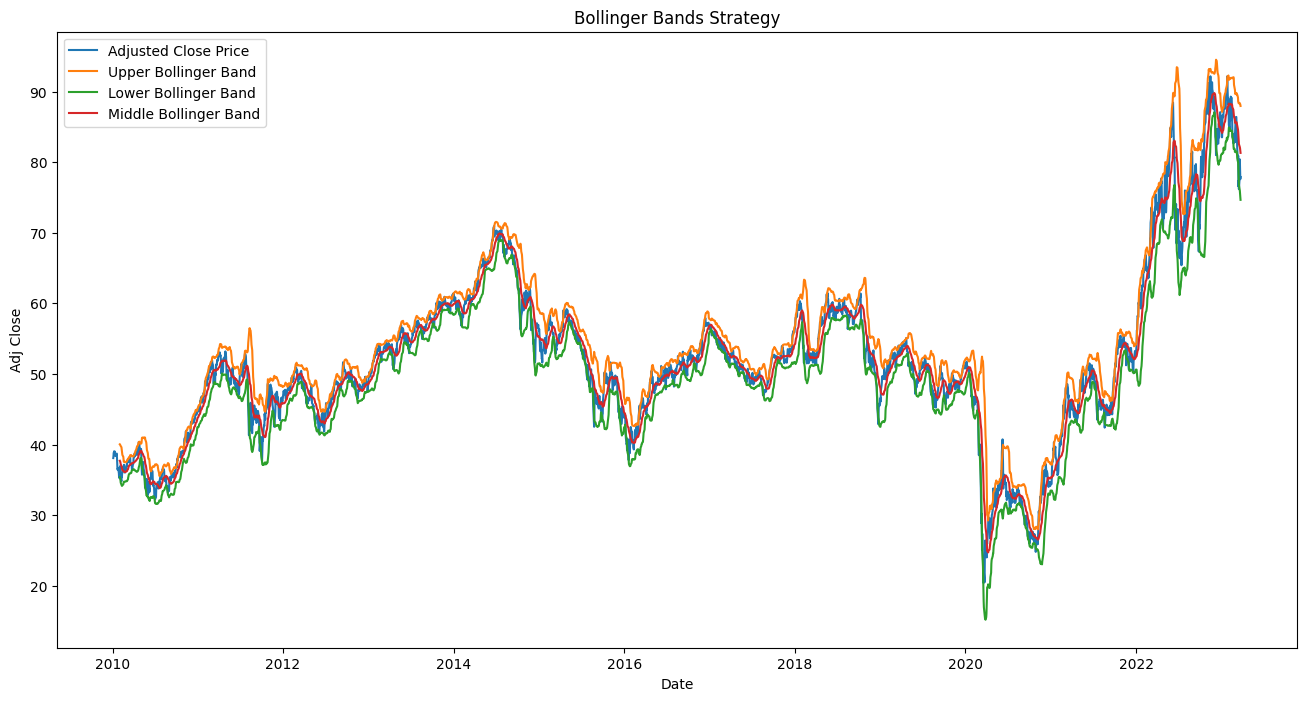

Starting balance: $100000.00
Final balance:  147331.4472141266


In [206]:
indicator_bb = BollingerBands(close=df['Adj Close'], window=20, window_dev=2)
df['bb_upperband'] = indicator_bb.bollinger_hband()
df['bb_lowerband'] = indicator_bb.bollinger_lband()
df['bb_midband'] = indicator_bb.bollinger_mavg()

# Define initial parameters
balance = 100000
shares = 0
buy_price = 0
sell_price = 0

# Loop through the data and execute trades
for i, row in df.iterrows():
    if row['Adj Close'] < row['bb_lowerband'] and shares == 0:
        shares = np.floor(balance / row['Adj Close'])
        buy_price = row['Adj Close']
        balance -= shares * buy_price
    elif row['Adj Close'] > row['bb_upperband'] and shares > 0:
        sell_price = row['Adj Close']
        balance += shares * sell_price
        shares = 0

# Calculate final balance
if shares > 0:
    final_balance = balance + shares * df.iloc[-1]['Adj Close']
else:
    final_balance = balance

# Plot the data and Bollinger Bands
plt.figure(figsize=(16,8))
sns.lineplot(data=df['Adj Close'], label='Adjusted Close Price')
sns.lineplot(data=df['bb_upperband'], label='Upper Bollinger Band')
sns.lineplot(data=df['bb_lowerband'], label='Lower Bollinger Band')
sns.lineplot(data=df['bb_midband'], label='Middle Bollinger Band')
plt.title('Bollinger Bands Strategy')
plt.legend()
plt.show()

print(f'Starting balance: $%.2f' % 100000)
print(f'Final balance: ' ,final_balance)

In [207]:
start = datetime(2010,1,1)
now = datetime.now().date()
data = yf.download(names_of_stocks ,start=start, end=now)
new_data = data["Adj Close"]
new_data

[*********************100%***********************]  11 of 11 completed


,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2010-01-04,14.540118,25.488930,38.080162,9.385944,21.880180,19.150225,18.718468,NaN,19.481918,25.213634,25.227173
2010-01-05,14.632099,25.571346,38.390972,9.558457,21.957447,19.125536,18.725485,NaN,19.249990,24.966368,25.319670
2010-01-06,14.391530,26.005901,38.850704,9.577621,22.003809,18.911566,18.711447,NaN,19.362823,25.221611,25.353292
2010-01-07,14.334934,25.803606,38.792423,9.782082,22.243319,18.837500,18.711447,NaN,19.275068,25.309353,25.563532
2010-01-08,14.228805,26.163240,39.044949,9.724577,22.598705,18.960943,18.648277,NaN,19.256262,25.349237,25.555113
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,22.343933,76.730003,77.699997,31.170000,97.550003,143.529999,72.760002,36.360001,67.000000,126.959999,141.520004
2023-03-21,22.602016,77.660004,80.389999,31.959999,98.680000,144.690002,72.699997,36.150002,65.650002,127.730003,145.429993
2023-03-22,22.065998,76.279999,78.680000,31.219999,96.790001,143.250000,72.029999,34.830002,64.360001,125.800003,142.190002


In [208]:
def Bollinger_Band(df,balance):
    indicator_bb = BollingerBands(close=df['Adj Close'], window=20, window_dev=2)
    df['bb_upperband'] = indicator_bb.bollinger_hband()
    df['bb_lowerband'] = indicator_bb.bollinger_lband()
    df['bb_midband'] = indicator_bb.bollinger_mavg()

    # Define initial parameters
    shares = 0
    buy_price = 0
    sell_price = 0

    # Loop through the data and execute trades
    for i, row in df.iterrows():
        if row['Adj Close'] < row['bb_lowerband'] and shares == 0:
            shares = np.floor(balance / row['Adj Close'])
            buy_price = row['Adj Close']
            balance -= shares * buy_price
        elif row['Adj Close'] > row['bb_upperband'] and shares > 0:
            sell_price = row['Adj Close']
            balance += shares * sell_price
            shares = 0

    # Calculate final balance
    if shares > 0:
        final_balance = balance + shares * df.iloc[-1]['Adj Close']
    else:
        final_balance = balance
    print(f'Final balance: ' ,final_balance)
    return final_balance

In [209]:
total_balance=0;
balance = 100000
for i in names_of_stocks:
    sector_name = i
    data_sector = pd.DataFrame(new_data[sector_name ])
    df = data_sector.rename(columns={sector_name: 'Adj Close'})
    new_balance = Bollinger_Band(df,balance)
    total_balance  += new_balance
    print(f'Total profit/loss for sector {sector_name}', new_balance)
print(f"Balance on the bank account:{total_balance}")
total_profit = total_balance-1100000
precent_growth = total_profit/1100000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

Final balance:  410897.74151420593
Total profit/loss for sector XLK 410897.74151420593
Final balance:  147331.29724121094
Total profit/loss for sector XLE 147331.29724121094
Final balance:  211163.15151786804
Total profit/loss for sector XLF 211163.15151786804
Final balance:  391590.8364543915
Total profit/loss for sector XLV 391590.8364543915
Final balance:  187316.80430412292
Total profit/loss for sector XLRE 187316.80430412292
Final balance:  205789.26021957397
Total profit/loss for sector XLB 205789.26021957397
Final balance:  344734.99476623535
Total profit/loss for sector XLY 344734.99476623535
Final balance:  367536.92070770264
Total profit/loss for sector XLP 367536.92070770264
Final balance:  298502.87833213806
Total profit/loss for sector XLU 298502.87833213806
Final balance:  354592.79645347595
Total profit/loss for sector XLI 354592.79645347595
Final balance:  181079.27959632874
Total profit/loss for sector IYZ 181079.27959632874
Balance on the bank account:3100535.96110725

In [125]:
start = datetime(2019,1,1)
now = datetime.now().date()
data = yf.download(names_of_stocks ,start=start, end=now)
new_data = data["Adj Close"]
new_data

[*********************100%***********************]  11 of 11 completed


,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2019-01-02,23.824308,46.518028,46.582314,21.971966,60.058697,59.279892,45.212463,26.417648,45.510162,79.129684,95.620476
2019-01-03,23.456394,45.198887,46.120323,21.478008,58.231159,56.288177,44.952721,26.539749,45.501419,77.522934,93.550087
2019-01-04,24.174269,46.976063,47.689526,22.191502,60.439060,58.782864,45.911068,26.810120,46.175182,79.835526,96.646072
2019-01-07,24.515257,47.140957,48.398457,22.218945,60.930733,59.308563,45.848366,27.036880,45.860176,80.142021,98.831467
2019-01-08,24.892136,47.635632,48.772835,22.237236,61.765644,59.805592,46.269321,27.507841,46.428955,80.764282,99.924164
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,22.343933,76.730003,77.699997,31.170000,97.550003,143.529999,72.760002,36.360001,67.000000,126.959999,141.520004
2023-03-21,22.602016,77.660004,80.389999,31.959999,98.680000,144.690002,72.699997,36.150002,65.650002,127.730003,145.429993
2023-03-22,22.065998,76.279999,78.680000,31.219999,96.790001,143.250000,72.029999,34.830002,64.360001,125.800003,142.190002


In [126]:
total_balance=0;
balance = 100000
for i in names_of_stocks:
    sector_name = i
    data_sector = pd.DataFrame(new_data[sector_name ])
    df = data_sector.rename(columns={sector_name: 'Adj Close'})
    new_balance = Bollinger_Band(df,balance)
    total_balance  += new_balance
    print(f'Total profit/loss for sector {sector_name}', new_balance)
print(f"Balance on the bank account:{total_balance}")
total_profit = total_balance-1100000
precent_growth = total_profit/1100000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

Final balance:  148460.3150177002
Total profit/loss for sector XLK 148460.3150177002
Final balance:  118142.20135116577
Total profit/loss for sector XLE 118142.20135116577
Final balance:  113532.26014900208
Total profit/loss for sector XLF 113532.26014900208
Final balance:  159470.36490631104
Total profit/loss for sector XLV 159470.36490631104
Final balance:  137389.23462486267
Total profit/loss for sector XLRE 137389.23462486267
Final balance:  114640.9783706665
Total profit/loss for sector XLB 114640.9783706665
Final balance:  109750.61961364746
Total profit/loss for sector XLY 109750.61961364746
Final balance:  161244.89123153687
Total profit/loss for sector XLP 161244.89123153687
Final balance:  121453.16882705688
Total profit/loss for sector XLU 121453.16882705688
Final balance:  134260.80771636963
Total profit/loss for sector XLI 134260.80771636963
Final balance:  116753.40174102783
Total profit/loss for sector IYZ 116753.40174102783
Balance on the bank account:1435098.243549347


In [127]:
start = datetime(2022,1,1)
now = datetime.now().date()
data = yf.download(names_of_stocks ,start=start, end=now)
new_data = data["Adj Close"]
new_data

[*********************100%***********************]  11 of 11 completed


,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2022-01-03,32.169991,87.039551,54.312729,38.528183,102.724968,173.429871,74.789047,49.259628,68.304405,136.773376,207.859482
2022-01-04,31.975908,88.110153,56.192127,39.541828,104.790436,171.592026,75.293465,49.067688,68.092361,134.968567,206.594391
2022-01-05,31.597431,88.100410,56.182629,39.083729,103.791962,166.315613,75.225563,47.474651,68.053810,134.007309,201.020126
2022-01-06,31.597431,86.990883,57.435562,39.658783,104.271614,165.475739,75.021843,47.532223,67.350235,132.457504,200.496277
2022-01-07,31.568321,86.913025,58.223392,40.126617,104.242249,163.954071,75.099457,47.282711,67.861061,131.780731,197.155670
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,22.343933,76.730003,77.699997,31.170000,97.550003,143.529999,72.760002,36.360001,67.000000,126.959999,141.520004
2023-03-21,22.602016,77.660004,80.389999,31.959999,98.680000,144.690002,72.699997,36.150002,65.650002,127.730003,145.429993
2023-03-22,22.065998,76.279999,78.680000,31.219999,96.790001,143.250000,72.029999,34.830002,64.360001,125.800003,142.190002


In [128]:
total_balance=0;
balance = 100000
for i in names_of_stocks:
    sector_name = i
    data_sector = pd.DataFrame(new_data[sector_name ])
    df = data_sector.rename(columns={sector_name: 'Adj Close'})
    new_balance = Bollinger_Band(df,balance)
    total_balance  += new_balance
    print(f'Total profit/loss for sector {sector_name}', new_balance)
print(f"Balance on the bank account:{total_balance}")
total_profit = total_balance-1100000
precent_growth = total_profit/1100000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

Final balance:  94182.85530090332
Total profit/loss for sector XLK 94182.85530090332
Final balance:  160534.24870300293
Total profit/loss for sector XLE 160534.24870300293
Final balance:  88071.91284942627
Total profit/loss for sector XLF 88071.91284942627
Final balance:  102592.3486404419
Total profit/loss for sector XLV 102592.3486404419
Final balance:  88903.91777038574
Total profit/loss for sector XLRE 88903.91777038574
Final balance:  106077.02695465088
Total profit/loss for sector XLB 106077.02695465088
Final balance:  80918.25408935547
Total profit/loss for sector XLY 80918.25408935547
Final balance:  103160.4002532959
Total profit/loss for sector XLP 103160.4002532959
Final balance:  104103.59782409668
Total profit/loss for sector XLU 104103.59782409668
Final balance:  99710.91836547852
Total profit/loss for sector XLI 99710.91836547852
Final balance:  96778.37208938599
Total profit/loss for sector IYZ 96778.37208938599
Balance on the bank account:1125033.8528404236
Total Profi

# ---------------------------------------top 3 sectors-------------------

In [246]:
sector_investments = {'XLK':100000, 'XLE':100000, 'XLF':100000, 'XLV':100000, 'XLRE':100000, 'XLB':100000, 'XLY':100000, 'XLP':100000, 'XLU':100000, 'XLI':100000, 'IYZ':100000}
weights = [0.5, 0.3, 0.2]

In [247]:
def data_year (num):
    start = datetime(num,1,1)
    end = datetime(num+1,1,1)
    if num == 2023:
            end = datetime.now().date()
    elif num == 2024:
        return
    data = yf.download(names_of_stocks ,start=start, end=end)
    new_data = data["Adj Close"]
    return new_data

In [248]:
def check_which_tree_to_invest (new_data):
    total_balance_check=0;
    balance = 100000
    profitable_sector =[]
    for i in names_of_stocks:
        sector_name = i
        data_sector = pd.DataFrame(new_data[sector_name ])
        df = data_sector.rename(columns={sector_name: 'Adj Close'})
        new_balance = Bollinger_Band(df,balance)
        total_balance_check  += new_balance
        profitable_sector.append({sector_name:new_balance})
    print(f"Balance on the bank account:{total_balance}")
    total_profit = total_balance-1100000
    precent_growth = total_profit/1100000
    print(f"Total Profit:{total_profit}")
    print(f"Return percent:{precent_growth}")
    top_three = sorted(profitable_sector, key=lambda x: list(x.values())[0], reverse=True)[:3]
    return top_three

In [249]:
def invest(new_data, top_three, balance):
    total_balance = 0
    for i in range(len(top_three)):
        sector_name = list(top_three[i].keys())[0]
        weight = weights[i]
        data_sector = pd.DataFrame(new_data[sector_name ])
        df = data_sector.rename(columns={sector_name: 'Adj Close'})
        new_balance = Bollinger_Band(df,balance*weight)
        total_balance  += new_balance
        print(f'Total profit/loss for sector {sector_name}', new_balance)
    print(f"Balance on the bank account:{total_balance}")
    total_profit = total_balance-balance
    precent_growth = total_profit/balance
    print(f"Total Profit:{total_profit}")
    print(f"Return percent:{precent_growth}")
    return total_balance

In [250]:
def Bollinger_Band(df,balance):
    indicator_bb = BollingerBands(close=df['Adj Close'], window=20, window_dev=2)
    df['bb_upperband'] = indicator_bb.bollinger_hband()
    df['bb_lowerband'] = indicator_bb.bollinger_lband()
    df['bb_midband'] = indicator_bb.bollinger_mavg()

    # Define initial parameters
    shares = 0
    buy_price = 0
    sell_price = 0

    # Loop through the data and execute trades
    for i, row in df.iterrows():
        if row['Adj Close'] < row['bb_lowerband'] and shares == 0:
            shares = np.floor(balance / row['Adj Close'])
            buy_price = row['Adj Close']
            balance -= shares * buy_price
        elif row['Adj Close'] > row['bb_upperband'] and shares > 0:
            sell_price = row['Adj Close']
            balance += shares * sell_price
            shares = 0

    # Calculate final balance
    if shares > 0:
        final_balance = balance + shares * df.iloc[-1]['Adj Close']
    else:
        final_balance = balance
    print(f'Final balance: ' ,final_balance)
    return final_balance

In [240]:
num = 2009
balance = 1000000
for i in range(12):
    #retrive the data of 2009 to 2010
    new_data = data_year(num)
    #first check which free sectors were most profitable according to Bollinegr band in num year
    #for exapmple the return will be top 3 sectors from 2009 - 2010 according to Bollinger Band
    top_three = check_which_tree_to_invest (new_data)
    #second investor in a year 2010 will invest onle in those tree sectors with the weigth accordingly:
    #weights = [0.5, 0.3, 0.2]  # weights for the first, second, and third sectors
    #invest in only the top three 
    new_data = data_year(num+1)
    balance = invest(new_data, top_three, balance)
    num+=1

[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1230786000, endDate = 1262322000
Final balance:  125094.16017627716
Final balance:  119585.99615478516
Final balance:  144739.52846717834
Final balance:  112296.33699417114
Final balance:  100000
Final balance:  147280.54180526733
Final balance:  105308.92891216278
Final balance:  104060.7598323822
Final balance:  106977.56865501404
Final balance:  115984.88727092743
Final balance:  135079.41249656677
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1262322000, endDate = 1293858000
Final balance:  513035.06505584717
Total profit/loss for sector XLB 513035.06505584717
Final balance:  292356.6495513916
Total profit/loss for sector XLF 292356.6495513916
Final balanc

[*********************100%***********************]  11 of 11 completed
Final balance:  982649.5085263252
Total profit/loss for sector XLY 982649.5085263252
Final balance:  603167.5387560844
Total profit/loss for sector XLK 603167.5387560844
Final balance:  382954.17073040013
Total profit/loss for sector XLF 382954.17073040013
Balance on the bank account:1968771.2180128098
Total Profit:165369.27105903625
Return percent:0.09169850977391407
[*********************100%***********************]  11 of 11 completed
Final balance:  111482.70018005371
Final balance:  97034.24509811401
Final balance:  106174.93482208252
Final balance:  107650.76593017578
Final balance:  115169.30506896973
Final balance:  113752.33618164062
Final balance:  108973.71067810059
Final balance:  102098.74659729004
Final balance:  105228.82774353027
Final balance:  114216.76121520996
Final balance:  102549.02841567993
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055

In [241]:
print(f"In the the end of 2023 the balance in the account will be {balance}")

In the the end of 2023 the balance in the account will be 2245493.393099785


In [242]:
total_profit = balance-1000000
precent_growth = total_profit/1000000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

Total Profit:1245493.3930997849
Return percent:1.245493393099785


In [262]:
num = 2018
balance = 1000000
for i in range(5):
    #retrive the data of 2009 to 2010
    new_data = data_year(num)
    #first check which free sectors were most profitable according to Bollinegr band in num year
    #for exapmple the return will be top 3 sectors from 2009 - 2010 according to Bollinger Band
    top_three = check_which_tree_to_invest (new_data)
    #second investor in a year 2010 will invest onle in those tree sectors with the weigth accordingly:
    #weights = [0.5, 0.3, 0.2]  # weights for the first, second, and third sectors
    #invest in only the top three 
    new_data = data_year(num+1)
    balance = invest(new_data, top_three, balance)
    num+=1
    print(num)

[*********************100%***********************]  11 of 11 completed
Final balance:  101568.52576446533
Final balance:  82441.15525817871
Final balance:  92583.04719734192
Final balance:  105913.03437805176
Final balance:  99637.31672668457
Final balance:  91992.54362869263
Final balance:  94809.9825668335
Final balance:  95697.88903808594
Final balance:  123361.78113555908
Final balance:  89853.66506195068
Final balance:  90462.63995170593
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed
Final balance:  512296.18325042725
Total profit/loss for sector XLU 512296.18325042725
Final balance:  323878.3921585083
Total profit/loss for sector XLV 323878.3921585083
Final balance:  235129.28798675537
Total profit/loss for sector XLK 235129.28798675537
Balance on the bank account:1071303.863395691
Total Profit:71303.86339569092
Return percent:0.07130386339569092
2

In [263]:
print(f"In the the end of 2023 the balance in the account will be {balance}")
total_profit = balance-1000000
precent_growth = total_profit/1000000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

In the the end of 2023 the balance in the account will be 1007383.1779975891
Total Profit:7383.177997589111
Return percent:0.0073831779975891115


In [264]:
num = 2021
balance = 1000000
for i in range(2):
    #retrive the data of 2009 to 2010
    new_data = data_year(num)
    #first check which free sectors were most profitable according to Bollinegr band in num year
    #for exapmple the return will be top 3 sectors from 2009 - 2010 according to Bollinger Band
    top_three = check_which_tree_to_invest (new_data)
    #second investor in a year 2010 will invest onle in those tree sectors with the weigth accordingly:
    #weights = [0.5, 0.3, 0.2]  # weights for the first, second, and third sectors
    #invest in only the top three 
    new_data = data_year(num+1)
    balance = invest(new_data, top_three, balance)
    num+=1
    print(num)

[*********************100%***********************]  11 of 11 completed
Final balance:  124475.99491882324
Final balance:  106891.40306091309
Final balance:  113769.40448760986
Final balance:  110804.32211303711
Final balance:  124023.97119903564
Final balance:  113856.67063903809
Final balance:  124094.76393127441
Final balance:  120911.7451095581
Final balance:  120176.30842208862
Final balance:  109265.10104370117
Final balance:  120179.16575050354
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed
Final balance:  436237.1391220093
Total profit/loss for sector XLK 436237.1391220093
Final balance:  220595.7103729248
Total profit/loss for sector XLY 220595.7103729248
Final balance:  181183.82656478882
Total profit/loss for sector XLRE 181183.82656478882
Balance on the bank account:838016.6760597229
Total Profit:-161983.3239402771
Return percent:-0.1619833239

In [265]:
print(f"In the the end of 2023 the balance in the account will be {balance}")
total_profit = balance-1000000
precent_growth = total_profit/1000000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

In the the end of 2023 the balance in the account will be 840598.8971138
Total Profit:-159401.10288619995
Return percent:-0.15940110288619996


# ----------------------Reinvest every month--------------------

In [282]:
def data_12_months (num, month):
    start = datetime(num,month+1,1)
    end = datetime(num+1,month+1,1)
    if num == 2023:
            end = datetime.now().date()
    elif num == 2024:
        return
    data = yf.download(names_of_stocks ,start=start, end=end)
    new_data = data["Adj Close"]
    return new_data

In [290]:
def data_month (num, month):
    if month == 11:
        start = datetime(num,month+1,1)
        end = datetime(num+1,1,1)
    else:
        start = datetime(num,month+1,1)
        end = datetime(num,month+2,1)
    if num == 2023:
            end = datetime.now().date()
    elif num == 2024:
        return
    data = yf.download(names_of_stocks ,start=start, end=end)
    new_data = data["Adj Close"]
    return new_data

In [293]:
num = 2009
balance = 1000000
for i in range(14):
    for i in range (12):
        #retrive the data of 2009 to 2010
        new_data = data_12_months (num, i)
        new_data_month = data_month(num, i)
        #first check which free sectors were most profitable according to Bollinegr band in num year
        #for exapmple the return will be top 3 sectors from 2009 - 2010 according to Bollinger Band
        top_three = check_which_tree_to_invest (new_data)
        #second investor in a year 2010 will invest onle in those tree sectors with the weigth accordingly:
        #weights = [0.5, 0.3, 0.2]  # weights for the first, second, and third sectors
        #invest in only the top three 
        new_data = data_12_months (num+1,i)
        balance = invest(new_data_month, top_three, balance)
        print(i)
    num+=1
    print(num)

[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1230786000, endDate = 1262322000
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1230786000, endDate = 1233464400
Final balance:  125094.62173652649
Final balance:  119588.53162765503
Final balance:  144740.0521569252
Final balance:  112296.99085617065
Final balance:  100000
Final balance:  147281.33155059814
Final balance:  105308.75751495361
Final balance:  104060.16771793365
Final balance:  106977.51372718811
Final balance:  115984.18260192871
Final balance:  135079.5006122589
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1262322000, endDate = 1293858000
Final balance:  50

[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1277956800, endDate = 1309492800
Final balance:  500000.0
Total profit/loss for sector IYZ 500000.0
Final balance:  300000.0
Total profit/loss for sector XLU 300000.0
Final balance:  200000.0
Total profit/loss for sector XLV 200000.0
Balance on the bank account:1000000.0
Total Profit:0.0
Return percent:0.0
6
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1249099200, endDate = 1280635200
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1249099200, endDate = 1251777600
Final balance:  95900.09170913696
Final balance:  104678.46580886841
Final balance:  100657.09454917908
Final balance:  104680.29494285583
Final balance:  100000
Final balance:  117869.37484550476
Final balance:  99851.164

[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1265000400, endDate = 1296536400
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1265000400, endDate = 1267419600
Final balance:  96432.19260787964
Final balance:  96441.72621154785
Final balance:  97452.24700737
Final balance:  98112.00449752808
Final balance:  100000
Final balance:  104983.04998016357
Final balance:  118911.97140312195
Final balance:  105019.20198059082
Final balance:  102760.44867706299
Final balance:  114156.08570098877
Final balance:  102249.10604858398
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1296536400, endDate = 1328072400
Final balance:  498355.

Final balance:  119181.38929367065
Final balance:  100000
Final balance:  113548.0138053894
Final balance:  117484.53129196167
Final balance:  118573.99374771118
Final balance:  121817.78090286255
Final balance:  110919.88006401062
Final balance:  93924.58463287354
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1328072400, endDate = 1359694800
Final balance:  495313.46026706684
Total profit/loss for sector XLU 495313.46026706684
Final balance:  297188.0761602401
Total profit/loss for sector XLV 297188.0761602401
Final balance:  198125.38410682674
Total profit/loss for sector XLP 198125.38410682674
Balance on the bank account:990626.9205341337
Total Profit:0.0
Return percent:0.0
1
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't ex

[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1343793600, endDate = 1375329600
Final balance:  495313.46026706684
Total profit/loss for sector XLF 495313.46026706684
Final balance:  297188.0761602401
Total profit/loss for sector XLY 297188.0761602401
Final balance:  198125.38410682674
Total profit/loss for sector XLI 198125.38410682674
Balance on the bank account:990626.9205341337
Total Profit:0.0
Return percent:0.0
7
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1314849600, endDate = 1346472000
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1314849600, endDate = 1317441600
Final balance:  106239.04474449158
Final balance:  116325.00747680664
Final balance:  153581.16639852524
Final balance:  125380.6372051239
Final balance:  1

[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1330578000, endDate = 1362114000
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1330578000, endDate = 1333252800
Final balance:  100457.50671386719
Final balance:  113129.3367805481
Final balance:  103991.90457487106
Final balance:  107639.82855415344
Final balance:  100000
Final balance:  104985.3654460907
Final balance:  115647.31289672852
Final balance:  112198.06996917725
Final balance:  114205.70800971985
Final balance:  113262.56651687622
Final balance:  96797.77224349976
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1362114000, endDate = 1393650000
Final balance:  495

[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1378008000, endDate = 1409544000
Final balance:  495313.46026706684
Total profit/loss for sector XLI 495313.46026706684
Final balance:  297188.0761602401
Total profit/loss for sector XLE 297188.0761602401
Final balance:  198125.38410682674
Total profit/loss for sector XLF 198125.38410682674
Balance on the bank account:990626.9205341337
Total Profit:0.0
Return percent:0.0
8
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1349064000, endDate = 1380600000
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1349064000, endDate = 1351742400
Final balance:  123384.44239425659
Final balance:  120298.15718841553
Final balance:  117490.49283981323
Final balance:  114366.52544403076
Final balance:  

[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1364788800, endDate = 1396324800
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1364788800, endDate = 1367380800
Final balance:  116552.05006790161
Final balance:  126828.17315673828
Final balance:  118212.67929077148
Final balance:  114192.69660949707
Final balance:  100000
Final balance:  116568.79802322388
Final balance:  118274.0534248352
Final balance:  105989.09024429321
Final balance:  101350.227268219
Final balance:  121745.88277816772
Final balance:  114601.28802871704
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1396324800, endDate = 1427860800
Final balance:  495

[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1398916800, endDate = 1430452800
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1398916800, endDate = 1401595200
Final balance:  116045.5038986206
Final balance:  96310.63554382324
Final balance:  110796.96448898315
Final balance:  122335.2935180664
Final balance:  100000
Final balance:  109152.45408248901
Final balance:  114692.70338439941
Final balance:  123493.3992767334
Final balance:  102216.67082214355
Final balance:  109574.89817428589
Final balance:  107229.9345664978
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed
Final balance:  495471.2548551558
Total profit/loss for sector XLP 495471.2548551558
Final balance:  297282.752913093

[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1417410000, endDate = 1420088400
Final balance:  106739.709690094
Final balance:  88191.47798919678
Final balance:  106157.40665054321
Final balance:  96185.48077392578
Final balance:  102670.7538986206
Final balance:  93094.0329170227
Final balance:  110706.15888595581
Final balance:  108313.43915939331
Final balance:  103091.69082641602
Final balance:  102388.24251174927
Final balance:  115238.69934082031
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed
Final balance:  488658.1967153548
Total profit/loss for sector IYZ 488658.1967153548
Final balance:  293194.91802921286
Total profit/loss for sector XLY 293194.91802921286
Final balance:  195463.27868614

[*********************100%***********************]  11 of 11 completed
Final balance:  492258.53813552845
Total profit/loss for sector XLK 492258.53813552845
Final balance:  295355.12288131705
Total profit/loss for sector XLU 295355.12288131705
Final balance:  196903.4152542114
Total profit/loss for sector XLE 196903.4152542114
Balance on the bank account:984517.0762710569
Total Profit:0.0
Return percent:0.0
1
[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
Final balance:  121953.86050796509
Final balance:  112093.41109466553
Final balance:  111675.56208610535
Final balance:  101637.19473266602
Final balance:  98063.9840183258
Final balance:  109629.20729064941
Final balance:  107977.28028869629
Final balance:  103137.34838104248
Final balance:  116389.3030090332
Final balance:  108852.20052719116
Final balance:  100211.5781288147
Balance on the bank account:3100535.961107254
Total Profit:2000

[*********************100%***********************]  11 of 11 completed
Final balance:  498662.5761432646
Total profit/loss for sector XLI 498662.5761432646
Final balance:  299197.54568595876
Total profit/loss for sector XLY 299197.54568595876
Final balance:  202208.84278945916
Total profit/loss for sector XLRE 202208.84278945916
Balance on the bank account:1000068.9646186825
Total Profit:2743.8123321533203
Return percent:0.002751171296404875
9
[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
Final balance:  106568.70052719116
Final balance:  91433.94867706299
Final balance:  111263.51486206055
Final balance:  105913.99279785156
Final balance:  114361.27676010132
Final balance:  109875.32117080688
Final balance:  108972.66983795166
Final balance:  100828.65859603882
Final balance:  108681.74171447754
Final balance:  111606.81077194214
Final balance:  99138.1950340271
Balance on the bank account:

[*********************100%***********************]  11 of 11 completed
Final balance:  500034.48230934126
Total profit/loss for sector XLK 500034.48230934126
Final balance:  300020.68938560475
Total profit/loss for sector XLY 300020.68938560475
Final balance:  198107.67437057488
Total profit/loss for sector XLU 198107.67437057488
Balance on the bank account:998162.8460655209
Total Profit:-1906.118553161621
Return percent:-0.0019059871074875395
5
[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
Final balance:  119447.06531906128
Final balance:  102878.64581680298
Final balance:  104493.7908821106
Final balance:  107507.04712677002
Final balance:  102368.88604736328
Final balance:  101325.51940536499
Final balance:  109742.66519165039
Final balance:  94643.28057861328
Final balance:  103942.15927505493
Final balance:  104863.09441375732
Final balance:  102231.36274147034
Balance on the bank accou

[*********************100%***********************]  11 of 11 completed
Final balance:  499081.42303276045
Total profit/loss for sector XLU 499081.42303276045
Final balance:  299448.85381965624
Total profit/loss for sector XLV 299448.85381965624
Final balance:  199632.5692131042
Total profit/loss for sector XLRE 199632.5692131042
Balance on the bank account:998162.8460655209
Total Profit:0.0
Return percent:0.0
1
[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
Final balance:  102040.40649414062
Final balance:  95990.80500030518
Final balance:  101955.55352401733
Final balance:  111254.14936828613
Final balance:  109518.10516929626
Final balance:  103664.81311798096
Final balance:  105514.41164398193
Final balance:  107839.11809921265
Final balance:  118638.76521682739
Final balance:  99768.71744537354
Final balance:  101401.83066177368
Balance on the bank account:3100535.961107254
Total Profit:2

[*********************100%***********************]  11 of 11 completed
Final balance:  499081.42303276045
Total profit/loss for sector XLY 499081.42303276045
Final balance:  299448.85381965624
Total profit/loss for sector XLI 299448.85381965624
Final balance:  199632.5692131042
Total profit/loss for sector XLP 199632.5692131042
Balance on the bank account:998162.8460655209
Total Profit:0.0
Return percent:0.0
9
[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
Final balance:  130430.20297241211
Final balance:  103042.68016052246
Final balance:  117630.29416275024
Final balance:  115484.62208557129
Final balance:  115749.06644058228
Final balance:  113416.38792419434
Final balance:  133383.85836791992
Final balance:  115495.01992797852
Final balance:  104847.20706176758
Final balance:  125903.07371520996
Final balance:  113890.16409111023
Balance on the bank account:3100535.961107254
Total Profit:

[*********************100%***********************]  11 of 11 completed
Final balance:  498086.47408485395
Total profit/loss for sector XLK 498086.47408485395
Final balance:  298851.88445091236
Total profit/loss for sector XLRE 298851.88445091236
Final balance:  199234.5896339416
Total profit/loss for sector XLV 199234.5896339416
Balance on the bank account:996172.948169708
Total Profit:1.1641532182693481e-10
Return percent:1.1686256090453715e-16
5
[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
Final balance:  117049.23657989502
Final balance:  67313.74604797363
Final balance:  87219.19631958008
Final balance:  113890.11694335938
Final balance:  109912.69054412842
Final balance:  95631.93746948242
Final balance:  100791.70444488525
Final balance:  105866.59445953369
Final balance:  90999.33064651489
Final balance:  97483.39623260498
Final balance:  105439.48553466797
Balance on the bank accoun

[*********************100%***********************]  11 of 11 completed
Final balance:  498086.474084854
Total profit/loss for sector XLV 498086.474084854
Final balance:  298851.8844509124
Total profit/loss for sector XLP 298851.8844509124
Final balance:  199234.58963394162
Total profit/loss for sector XLK 199234.58963394162
Balance on the bank account:996172.948169708
Total Profit:0.0
Return percent:0.0
1
[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
Final balance:  113030.1524887085
Final balance:  97572.6900730133
Final balance:  112869.02500915527
Final balance:  124871.92108917236
Final balance:  120302.58605957031
Final balance:  113104.36737060547
Final balance:  120468.5532836914
Final balance:  117643.66858673096
Final balance:  108044.73234176636
Final balance:  125487.21669769287
Final balance:  100877.7746257782
Balance on the bank account:3100535.961107254
Total Profit:2000535.96

[*********************100%***********************]  11 of 11 completed
Final balance:  507406.296268463
Total profit/loss for sector XLI 507406.296268463
Final balance:  311381.6922191619
Total profit/loss for sector XLE 311381.6922191619
Final balance:  201289.57213363645
Total profit/loss for sector XLRE 201289.57213363645
Balance on the bank account:1020077.5606212614
Total Profit:18639.778173446655
Return percent:0.018613016704727717
9
[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed

1 Failed download:
- XLY: No data found for this date range, symbol may be delisted
Final balance:  116635.9321899414
Final balance:  103945.71984100342
Final balance:  114967.4743347168
Final balance:  105446.17572784424
Final balance:  119075.68824768066
Final balance:  105370.21244049072
Final balance:  116285.67428588867
Final balance:  108612.08486938477
Final balance:  114641.93016052246
Final balance:  

Final balance:  86301.29388427734
Final balance:  109839.63613128662
Final balance:  108251.48133087158
Final balance:  104191.18961334229
Final balance:  94818.02952384949
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed
Final balance:  510038.7803106307
Total profit/loss for sector XLE 510038.7803106307
Final balance:  306023.2681863784
Total profit/loss for sector XLF 306023.2681863784
Final balance:  204015.51212425227
Total profit/loss for sector XLB 204015.51212425227
Balance on the bank account:1020077.5606212614
Total Profit:0.0
Return percent:0.0
5
[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
Final balance:  90240.23851776123
Final balance:  125285.50009918213
Final balance:  94710.21352005005
Final balance:  106068.60573577881
Final balance:  101420.2

Final balance:  106197.16945648193
Final balance:  95564.23494720459
Final balance:  102668.73359107971
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed
Final balance:  510038.7803106307
Total profit/loss for sector XLE 510038.7803106307
Final balance:  306023.2681863784
Total profit/loss for sector XLU 306023.2681863784
Final balance:  204015.51212425227
Total profit/loss for sector XLV 204015.51212425227
Balance on the bank account:1020077.5606212614
Total Profit:0.0
Return percent:0.0
1
[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
Final balance:  101919.21975708008
Final balance:  154447.5021057129
Final balance:  102712.01921081543
Final balance:  101246.69483947754
Final balance:  87386.58180999756
Final balance:  95592.25581359863
Final balance:  79215.40

[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
Final balance:  102193.02856445312
Final balance:  133886.9361038208
Final balance:  100843.85691261292
Final balance:  96736.89405822754
Final balance:  91253.83335494995
Final balance:  111076.26944732666
Final balance:  90971.8822631836
Final balance:  102495.63688659668
Final balance:  95070.27020263672
Final balance:  102489.35459899902
Final balance:  97550.63397407532
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed

11 Failed downloads:
- XLI: Invalid input - start date cannot be after end date. startDate = 1688184000, endDate = 1679889600
- XLF: Invalid input - start date cannot be after end date. startDate = 1688184000, endDate = 1679889600
- XLY: Invalid input - start date cannot be after end date. startDa

[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
Final balance:  107101.27291870117
Final balance:  105484.40914916992
Final balance:  92020.80628585815
Final balance:  96240.0
Final balance:  97280.77326965332
Final balance:  110358.99082946777
Final balance:  105850.68727111816
Final balance:  98793.0444946289
Final balance:  96026.04411315918
Final balance:  103654.74418640137
Final balance:  110402.58483886719
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed

11 Failed downloads:
- XLY: Invalid input - start date cannot be after end date. startDate = 1698811200, endDate = 1679889600
- XLK: Invalid input - start date cannot be after end date. startDate = 1698811200, endDate = 1679889600
- XLP: Invalid input - start date cannot be after end date. startDate = 1698

In [294]:
print(f"In the the end of 2023 the balance in the account will be {balance}")
total_profit = balance-1000000
precent_growth = total_profit/1000000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

In the the end of 2023 the balance in the account will be 1019011.697502136
Total Profit:19011.697502135998
Return percent:0.019011697502135997


In [295]:
num = 2019
balance = 1000000
for i in range(4):
    for i in range (12):
        #retrive the data of 2009 to 2010
        new_data = data_12_months (num, i)
        new_data_month = data_month(num, i)
        #first check which free sectors were most profitable according to Bollinegr band in num year
        #for exapmple the return will be top 3 sectors from 2009 - 2010 according to Bollinger Band
        top_three = check_which_tree_to_invest (new_data)
        #second investor in a year 2010 will invest onle in those tree sectors with the weigth accordingly:
        #weights = [0.5, 0.3, 0.2]  # weights for the first, second, and third sectors
        #invest in only the top three 
        new_data = data_12_months (num+1,i)
        balance = invest(new_data_month, top_three, balance)
        print(i)
    num+=1
    print(num)

[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
Final balance:  117559.60733795166
Final balance:  109770.94805526733
Final balance:  124535.41488456726
Final balance:  107957.87870025635
Final balance:  106734.94487762451
Final balance:  111688.19388580322
Final balance:  116474.03665924072
Final balance:  115041.12163925171
Final balance:  102458.33250427246
Final balance:  121568.1629562378
Final balance:  107907.62344360352
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed
Final balance:  500000.0
Total profit/loss for sector XLF 500000.0
Final balance:  300000.0
Total profit/loss for sector XLI 300000.0
Final balance:  200000.0
Total profit/loss for sector XLK 200000.0
Balance on the bank account:1000000.0
Total Profit:0.0
Return percent:0.0
0
[***************

[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
Final balance:  118647.13568878174
Final balance:  105034.82567024231
Final balance:  112869.02500915527
Final balance:  130212.10010528564
Final balance:  115712.90523910522
Final balance:  113104.36737060547
Final balance:  129724.15940856934
Final balance:  128141.9034500122
Final balance:  116044.45487976074
Final balance:  130761.5760269165
Final balance:  109501.79447937012
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed
Final balance:  499003.20757865906
Total profit/loss for sector XLI 499003.20757865906
Final balance:  299401.92454719543
Total profit/loss for sector XLV 299401.92454719543
Final balance:  199601.28303146362
Total profit/loss for sector XLY 199601.28303146362
Balance on the bank account:99800

[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
Final balance:  124570.71615600586
Final balance:  105523.55332183838
Final balance:  113228.06769943237
Final balance:  110415.6241531372
Final balance:  124024.33131408691
Final balance:  112784.4513015747
Final balance:  123915.21206665039
Final balance:  120913.87099456787
Final balance:  119278.3165435791
Final balance:  108508.14455413818
Final balance:  118799.84488105774
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed
Final balance:  510977.2709875107
Total profit/loss for sector XLK 510977.2709875107
Final balance:  306586.3625925064
Total profit/loss for sector XLRE 306586.3625925064
Final balance:  204390.90839500428
Total profit/loss for sector XLY 204390.90839500428
Balance on the bank account:1021954.5

[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
Final balance:  94374.72229003906
Final balance:  134431.29669952393
Final balance:  91206.03048706055
Final balance:  111332.44174957275
Final balance:  101364.38822937012
Final balance:  92003.55967712402
Final balance:  81708.68562316895
Final balance:  111990.52912139893
Final balance:  118479.27702713013
Final balance:  92928.9031829834
Final balance:  97071.88242530823
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed
Final balance:  510977.2709875107
Total profit/loss for sector XLE 510977.2709875107
Final balance:  306586.3625925064
Total profit/loss for sector XLU 306586.3625925064
Final balance:  204390.90839500428
Total profit/loss for sector XLP 204390.90839500428
Balance on the bank account:1021954.541975

[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
Final balance:  109934.9446105957
Final balance:  132162.69522094727
Final balance:  101193.21112442017
Final balance:  101577.93029785156
Final balance:  92052.9773979187
Final balance:  107269.62886047363
Final balance:  90201.18766784668
Final balance:  99898.28698730469
Final balance:  100116.95043182373
Final balance:  103014.4713973999
Final balance:  107571.73696899414
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed

11 Failed downloads:
- XLV: Invalid input - start date cannot be after end date. startDate = 1682913600, endDate = 1679889600
- XLF: Invalid input - start date cannot be after end date. startDate = 1682913600, endDate = 1679889600
- XLY: Invalid input - start date cannot be after end date. startD

[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
Final balance:  107101.27291870117
Final balance:  105431.44793701172
Final balance:  91947.73240089417
Final balance:  96255.04321289062
Final balance:  97171.50119018555
Final balance:  110295.13842773438
Final balance:  107259.63877868652
Final balance:  103877.96114349365
Final balance:  101388.31266784668
Final balance:  103596.44386291504
Final balance:  110279.01172447205
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed

11 Failed downloads:
- IYZ: Invalid input - start date cannot be after end date. startDate = 1693540800, endDate = 1679889600
- XLP: Invalid input - start date cannot be after end date. startDate = 1693540800, endDate = 1679889600
- XLU: Invalid input - start date cannot be after end date. sta

In [296]:
print(f"In the the end of 2023 the balance in the account will be {balance}")
total_profit = balance-1000000
precent_growth = total_profit/1000000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

In the the end of 2023 the balance in the account will be 1020886.5988693237
Total Profit:20886.59886932373
Return percent:0.02088659886932373


In [298]:
num = 2022
balance = 1000000
for i in range(1):
    for i in range (12):
        #retrive the data of 2009 to 2010
        new_data = data_12_months(num,i)
        #first check which free sectors were most profitable according to Bollinegr band in num year
        #for exapmple the return will be top 3 sectors from 2009 - 2010 according to Bollinger Band
        top_three = check_which_tree_to_invest (new_data)
        #second investor in a year 2010 will invest onle in those tree sectors with the weigth accordingly:
        #weights = [0.5, 0.3, 0.2]  # weights for the first, second, and third sectors
        #invest in only the top three 
        new_data = data_12_months (num+1,i)
        balance = invest(new_data, top_three, balance)
        print (f"The real balance is:{balance}")
        print(i)
    num+=1
    print(num)

[*********************100%***********************]  11 of 11 completed
Final balance:  86653.37351989746
Final balance:  150407.85472869873
Final balance:  94313.03620529175
Final balance:  105823.69483947754
Final balance:  87558.91482925415
Final balance:  93350.38358306885
Final balance:  72898.00524902344
Final balance:  101504.2274093628
Final balance:  105782.18461608887
Final balance:  96807.89849090576
Final balance:  93422.46818351746
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed
Final balance:  503425.3821105957
Total profit/loss for sector XLE 503425.3821105957
Final balance:  291928.63020324707
Total profit/loss for sector XLV 291928.63020324707
Final balance:  197891.60919189453
Total profit/loss for sector XLU 197891.60919189453
Balance on the bank account:993245.6215057373
Total Profit:-6754.378494262695
Return percent:-0.0067543784942626

[*********************100%***********************]  11 of 11 completed
Final balance:  101941.41885375977
Final balance:  131006.34483337402
Final balance:  97934.91241836548
Final balance:  95971.48358154297
Final balance:  89680.8171043396
Final balance:  109183.37831115723
Final balance:  90143.86000061035
Final balance:  99891.48572540283
Final balance:  92922.67448425293
Final balance:  101520.88606262207
Final balance:  102608.84400367737
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed

11 Failed downloads:
- XLK: Invalid input - start date cannot be after end date. startDate = 1688184000, endDate = 1679889600
- IYZ: Invalid input - start date cannot be after end date. startDate = 1688184000, endDate = 1679889600
- XLRE: Invalid input - start date cannot be after end date. startDate = 1688184000, endDate = 1679889600
- XLY: Invalid input - start dat

[*********************100%***********************]  11 of 11 completed
Final balance:  107101.27291870117
Final balance:  105385.11318969727
Final balance:  91903.88918495178
Final balance:  96266.32275390625
Final balance:  97171.50119018555
Final balance:  110295.13842773438
Final balance:  105716.23274230957
Final balance:  98808.78712463379
Final balance:  95989.71689605713
Final balance:  103601.74095153809
Final balance:  110229.58059310913
Balance on the bank account:3100535.961107254
Total Profit:2000535.961107254
Return percent:1.818669055552049
[*********************100%***********************]  11 of 11 completed

11 Failed downloads:
- IYZ: Invalid input - start date cannot be after end date. startDate = 1698811200, endDate = 1679889600
- XLP: Invalid input - start date cannot be after end date. startDate = 1698811200, endDate = 1679889600
- XLE: Invalid input - start date cannot be after end date. startDate = 1698811200, endDate = 1679889600
- XLI: Invalid input - start da

In [299]:
print(f"In the the end of 2023 the balance in the account will be {balance}")
total_profit = balance-1000000
precent_growth = total_profit/1000000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

In the the end of 2023 the balance in the account will be 1005381.0598297119
Total Profit:5381.059829711914
Return percent:0.005381059829711914


---------------------------------------------------------------------------------------------------------------------

# Strategy 4: The strategies of buying stocks in September, after the New Year, and on Christmas are examples of seasonal investing strategies. These strategies involve buying stocks during specific times of the year when historical data suggests that the stock market tends to perform better.

### The "September Effect" is a theory that suggests that stock prices tend to decline in September. Some investors believe that this is due to investors selling stocks to pay for back-to-school expenses or that institutional investors rebalance their portfolios in September. As a result, buying stocks after September may be seen as a good opportunity to invest.

### The "January Effect" is another seasonal strategy where investors buy stocks at the start of the year. It's based on the idea that investors sell stocks in December to realize losses for tax purposes and then buy them back in January, leading to a temporary increase in stock prices.

### Buying stocks around Christmas is also a seasonal strategy. Historically, stock prices tend to rise during the week between Christmas and New Year's Day. Some investors attribute this to optimism about the upcoming year and holiday bonuses being invested in the stock market.

In [5]:
def seasonality_strategy(df, balance):
    # Define the buy and sell months
    buy_months = [9, 10]
    sell_months = [1, 2, 11, 12]

    # Loop through each row in the dataframe
    shares_bought = 0
    trades = 0
    for index, row in df.iterrows():
        month = index.month
        # Check if it's a buy month and no shares are currently held
        if month in buy_months and shares_bought == 0:
            # Buy the stock with the entire balance
            shares_bought = balance / row['Adj Close']
            trades += 1
        # Check if it's a sell month and shares are currently held
        elif month in sell_months and shares_bought > 0:
            # Sell all the stock
            balance = shares_bought * row['Adj Close']
            shares_bought = 0
            trades += 1
    # Print the final portfolio balance and number of trades
    print(f"Final portfolio balance: {balance}")
    print(f"Number of trades: {trades}")
    return balance, trades

In [7]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import datetime
import numpy as np

### From 2010 until now

In [10]:
start = datetime(2010,1,1)
now = datetime.now().date()
data = yf.download(names_of_stocks ,start=start, end=now)
new_data = data["Adj Close"]
new_data

[*********************100%***********************]  11 of 11 completed


,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2010-01-04,14.540119,25.488930,38.080181,9.385946,21.880188,19.150229,18.718460,NaN,19.481924,25.213633,25.227169
2010-01-05,14.632107,25.571346,38.390976,9.558458,21.957449,19.125542,18.725481,NaN,19.249992,24.966368,25.319670
2010-01-06,14.391537,26.005898,38.850697,9.577623,22.003807,18.911564,18.711447,NaN,19.362825,25.221619,25.353302
2010-01-07,14.334932,25.803602,38.792427,9.782084,22.243313,18.837500,18.711447,NaN,19.275061,25.309353,25.563526
2010-01-08,14.228799,26.163237,39.044949,9.724583,22.598713,18.960945,18.648279,NaN,19.256258,25.349241,25.555120
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-22,22.065998,76.279999,78.680000,31.219999,96.790001,143.250000,72.029999,34.830002,64.360001,125.800003,142.190002
2023-03-23,22.100000,76.190002,77.589996,31.010000,96.510002,145.580002,71.750000,34.619999,63.700001,125.559998,142.039993
2023-03-24,22.209999,76.809998,77.889999,30.990000,96.910004,145.960007,72.970001,35.509998,65.690002,127.300003,141.580002


In [12]:
balance=100000
total_balance=0;
for i in names_of_stocks:
    sector_name = i
    data_sector = pd.DataFrame(new_data[sector_name ])
    df = data_sector.rename(columns={sector_name: 'Adj Close'})
    new_balance, trades = seasonality_strategy(df, balance)
    total_balance  += new_balance
    print(f'Total profit/loss for sector {sector_name}', new_balance)
    print(f"NUmber of trades {trades}")
print(f"Balance on the bank account:{total_balance}")
total_profit = total_balance-1100000
precent_growth = total_profit/1100000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

Final portfolio balance: 134013.66327234835
Number of trades: 26
Total profit/loss for sector XLK 134013.66327234835
NUmber of trades 26
Final portfolio balance: 153142.5566979393
Number of trades: 26
Total profit/loss for sector XLE 153142.5566979393
NUmber of trades 26
Final portfolio balance: 149449.4897460199
Number of trades: 26
Total profit/loss for sector XLF 149449.4897460199
NUmber of trades 26
Final portfolio balance: 134086.6317548441
Number of trades: 26
Total profit/loss for sector XLV 134086.6317548441
NUmber of trades 26
Final portfolio balance: 100000
Number of trades: 1
Total profit/loss for sector XLRE 100000
NUmber of trades 1
Final portfolio balance: 129951.77133651955
Number of trades: 26
Total profit/loss for sector XLB 129951.77133651955
NUmber of trades 26
Final portfolio balance: 131697.312530387
Number of trades: 26
Total profit/loss for sector XLY 131697.312530387
NUmber of trades 26
Final portfolio balance: 124360.58525111787
Number of trades: 26
Total profi

# From 2019 until now 

In [18]:
start = datetime(2019,1,1)
now = datetime.now().date()
data = yf.download(names_of_stocks ,start=start, end=now)
new_data = data["Adj Close"]
new_data

[*********************100%***********************]  11 of 11 completed


,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2019-01-02,23.824308,46.518013,46.582325,21.971966,60.058701,59.279892,45.212456,26.417646,45.510162,79.129684,95.620453
2019-01-03,23.456398,45.198891,46.120319,21.478006,58.231155,56.288177,44.952721,26.539747,45.501419,77.522926,93.550095
2019-01-04,24.174267,46.976059,47.689529,22.191502,60.439064,58.782856,45.911064,26.810120,46.175179,79.835510,96.646080
2019-01-07,24.515259,47.140953,48.398457,22.218941,60.930740,59.308563,45.848366,27.036879,45.860188,80.142029,98.831467
2019-01-08,24.892141,47.635632,48.772839,22.237238,61.765656,59.805580,46.269329,27.507847,46.428940,80.764282,99.924164
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-22,22.065998,76.279999,78.680000,31.219999,96.790001,143.250000,72.029999,34.830002,64.360001,125.800003,142.190002
2023-03-23,22.100000,76.190002,77.589996,31.010000,96.510002,145.580002,71.750000,34.619999,63.700001,125.559998,142.039993
2023-03-24,22.209999,76.809998,77.889999,30.990000,96.910004,145.960007,72.970001,35.509998,65.690002,127.300003,141.580002


In [19]:
balance=100000
total_balance=0;
for i in names_of_stocks:
    sector_name = i
    data_sector = pd.DataFrame(new_data[sector_name ])
    df = data_sector.rename(columns={sector_name: 'Adj Close'})
    new_balance, trades = seasonality_strategy(df, balance)
    total_balance  += new_balance
    print(f'Total profit/loss for sector {sector_name}', new_balance)
    print(f"NUmber of trades {trades}")
print(f"Balance on the bank account:{total_balance}")
total_profit = total_balance-1100000
precent_growth = total_profit/1100000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

Final portfolio balance: 91842.14921611724
Number of trades: 8
Total profit/loss for sector XLK 91842.14921611724
NUmber of trades 8
Final portfolio balance: 129422.3201747214
Number of trades: 8
Total profit/loss for sector XLE 129422.3201747214
NUmber of trades 8
Final portfolio balance: 116986.91583859033
Number of trades: 8
Total profit/loss for sector XLF 116986.91583859033
NUmber of trades 8
Final portfolio balance: 106825.1899803712
Number of trades: 8
Total profit/loss for sector XLV 106825.1899803712
NUmber of trades 8
Final portfolio balance: 84568.98132033927
Number of trades: 8
Total profit/loss for sector XLRE 84568.98132033927
NUmber of trades 8
Final portfolio balance: 107567.99984996459
Number of trades: 8
Total profit/loss for sector XLB 107567.99984996459
NUmber of trades 8
Final portfolio balance: 99171.8341964789
Number of trades: 8
Total profit/loss for sector XLY 99171.8341964789
NUmber of trades 8
Final portfolio balance: 95789.9992287551
Number of trades: 8
Tota

In [20]:
start = datetime(2022,1,1)
now = datetime.now().date()
data = yf.download(names_of_stocks ,start=start, end=now)
new_data = data["Adj Close"]
new_data

[*********************100%***********************]  11 of 11 completed


,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2022-01-03,32.169991,87.039543,54.312725,38.528179,102.724960,173.429886,74.789040,49.259624,68.304405,136.773376,207.859482
2022-01-04,31.975899,88.110153,56.192123,39.541824,104.790428,171.592026,75.293465,49.067692,68.092369,134.968567,206.594391
2022-01-05,31.597431,88.100410,56.182629,39.083733,103.791969,166.315628,75.225563,47.474648,68.053818,134.007294,201.020126
2022-01-06,31.597431,86.990883,57.435566,39.658779,104.271622,165.475723,75.021851,47.532223,67.350243,132.457504,200.496277
2022-01-07,31.568317,86.913025,58.223396,40.126614,104.242249,163.954071,75.099457,47.282715,67.861061,131.780716,197.155670
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-22,22.065998,76.279999,78.680000,31.219999,96.790001,143.250000,72.029999,34.830002,64.360001,125.800003,142.190002
2023-03-23,22.100000,76.190002,77.589996,31.010000,96.510002,145.580002,71.750000,34.619999,63.700001,125.559998,142.039993
2023-03-24,22.209999,76.809998,77.889999,30.990000,96.910004,145.960007,72.970001,35.509998,65.690002,127.300003,141.580002


In [21]:
balance=100000
total_balance=0;
for i in names_of_stocks:
    sector_name = i
    data_sector = pd.DataFrame(new_data[sector_name ])
    df = data_sector.rename(columns={sector_name: 'Adj Close'})
    new_balance, trades = seasonality_strategy(df, balance)
    total_balance  += new_balance
    print(f'Total profit/loss for sector {sector_name}', new_balance)
    print(f"NUmber of trades {trades}")
print(f"Balance on the bank account:{total_balance}")
total_profit = total_balance-1100000
precent_growth = total_profit/1100000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

Final portfolio balance: 94437.64000018733
Number of trades: 2
Total profit/loss for sector XLK 94437.64000018733
NUmber of trades 2
Final portfolio balance: 116990.2567998248
Number of trades: 2
Total profit/loss for sector XLE 116990.2567998248
NUmber of trades 2
Final portfolio balance: 103315.89712814412
Number of trades: 2
Total profit/loss for sector XLF 103315.89712814412
NUmber of trades 2
Final portfolio balance: 105164.79172608437
Number of trades: 2
Total profit/loss for sector XLV 105164.79172608437
NUmber of trades 2
Final portfolio balance: 88104.30202295423
Number of trades: 2
Total profit/loss for sector XLRE 88104.30202295423
NUmber of trades 2
Final portfolio balance: 100362.89441357709
Number of trades: 2
Total profit/loss for sector XLB 100362.89441357709
NUmber of trades 2
Final portfolio balance: 91039.64096822702
Number of trades: 2
Total profit/loss for sector XLY 91039.64096822702
NUmber of trades 2
Final portfolio balance: 99267.79660156993
Number of trades: 2

# Strategy number 5: INFLATION STRATEGY

The function takes in three arguments:
df_inflation: a Pandas DataFrame that contains the inflation rates over time. This DataFrame has a single column called "Inflation Rate" and an index of dates.
df: a Pandas DataFrame that contains the prices of various sectors over time. This DataFrame has columns for the prices of each sector (named with the sector code) and an index of dates.
balance: the initial amount of money to invest.
The function works by merging the df and df_inflation DataFrames based on their dates. It then defines a dictionary that maps inflation rate ranges to sector weights, which is used to determine the sector weights for each inflation rate. The function then calculates the number of shares to buy for each sector based on the initial balance and the sector weights for the current inflation rate.

The function then loops through each row in the merged DataFrame and determines the current inflation rate. If the inflation rate has changed since the previous row, the function sells all the shares and invests in the new sectors based on the sector weights for the new inflation rate. If the inflation rate has not changed, the function calculates the current sector weights based on the current inflation rate and determines the target sector values based on the current sector weights. The function then calculates the total portfolio value and determines the number of shares to buy or sell for each sector based on the target sector values and the current sector values.

The function keeps track of the total balance and the number of trades made, and prints out the number of shares bought or sold for each sector and the current balance after each trade. The final balance is returned at the end of the function.


In [273]:
balance=1000000

In [274]:
start = datetime(2010,1,1)
now = datetime.now().date()
data = yf.download(names_of_stocks  ,start=start, end=now)
new_data = data["Adj Close"]
# Remove rows with NaN values
new_data

[*********************100%***********************]  11 of 11 completed


,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2010-01-04,14.540130,25.488926,38.080173,9.385942,21.880198,19.150229,18.718466,NaN,19.481918,25.213638,25.227169
2010-01-05,14.632103,25.571344,38.390980,9.558458,21.957445,19.125536,18.725479,NaN,19.249985,24.966364,25.319660
2010-01-06,14.391538,26.005898,38.850708,9.577624,22.003807,18.911570,18.711445,NaN,19.362818,25.221615,25.353310
2010-01-07,14.334934,25.803602,38.792431,9.782086,22.243320,18.837505,18.711445,NaN,19.275063,25.309353,25.563530
2010-01-08,14.228798,26.163239,39.044964,9.724578,22.598711,18.960947,18.648279,NaN,19.256258,25.349241,25.555120
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,22.100000,76.190002,77.589996,31.010000,96.510002,145.580002,71.750000,34.619999,63.700001,125.559998,142.039993
2023-03-24,22.209999,76.809998,77.889999,30.990000,96.910004,145.960007,72.970001,35.509998,65.690002,127.300003,141.580002
2023-03-27,22.330000,77.379997,79.550003,31.420000,97.720001,144.830002,73.360001,35.389999,65.769997,127.820000,141.869995


In [275]:
from fredapi import Fred
import pandas as pd

# Replace YOUR_API_KEY with your actual API key
fred = Fred(api_key='8cdef904290a875557d76cc5f76d7e11')

# Get inflation rate data
inflation = fred.get_series('CPALTT01USM657N')

# Filter data from 2010.1.1 onwards
inflation = inflation['2010-01-01':]

# Convert to a Pandas DataFrame
df_inflation = pd.DataFrame({'Inflation Rate': inflation})

# Print the first few rows of the DataFrame
print(df_inflation.head(5))


            Inflation Rate
2010-01-01        0.341747
2010-02-01        0.024921
2010-03-01        0.410628
2010-04-01        0.173688
2010-05-01        0.077520


In [276]:
import math

In [302]:
def inflation_strategy(df_inflation, df, balance):
    total_balance = 0
    # Merge the two dataframes based on their dates
    merged_data = pd.merge(df, df_inflation, left_index=True, right_index=True)
    # Define the inflation ranges and corresponding sector weights
    inflation_ranges = {
        (0, 0.02): {'XLK': 0.2, 'XLE': 0.2, 'XLF': 0.2, 'XLV': 0.1, 'XLRE': 0.1, 'XLB': 0.05, 'XLY': 0.05, 'XLP': 0.05, 'XLU': 0.05, 'XLI': 0.05},
        (0.02, 0.04): {'XLK': 0.1, 'XLE': 0.3, 'XLF': 0.2, 'XLV': 0.05, 'XLRE': 0.1, 'XLB': 0.05, 'XLY': 0.05, 'XLP': 0.05, 'XLU': 0.05, 'XLI': 0.1},
        (0.04, np.inf): {'XLK': 0.05, 'XLE': 0.4, 'XLF': 0.15, 'XLV': 0.05, 'XLRE': 0.1, 'XLB': 0.05, 'XLY': 0.05, 'XLP': 0.05, 'XLU': 0.05, 'XLI': 0.1}
    }
    
    shares_bought = {}
    trades = 0
    
    # Set the initial investment strategy based on the current inflation rate
    current_inflation_rate = merged_data.iloc[0]['Inflation Rate']
    for inflation_range, sector_weights in inflation_ranges.items():
        if current_inflation_rate >= inflation_range[0] and current_inflation_rate < inflation_range[1]:
            current_sector_weights = sector_weights
            break
    for sector, weight in current_sector_weights.items():
        if math.isnan(merged_data.iloc[0][("Adj Close", f"{sector}")]):
        # If the value is NaN, skip to the next sector
            continue
        shares_bought[sector] = weight * balance / merged_data.iloc[0][("Adj Close", f"{sector}")] 
    print(shares_bought)
    # Loop through each row in the merged dataframe
    balance = 0
    for index, row in merged_data.iterrows():
        # Determine the current inflation rate
        inflation_rate = row['Inflation Rate']
        # If the inflation rate has changed, sell all the shares and invest based on the new inflation rate
        if inflation_rate != current_inflation_rate:
            # Sell all the shares
            for sector, shares in shares_bought.items():
                if math.isnan(row[("Adj Close", f"{sector}")]):
                    # If the value is NaN, skip to the next sector
                    continue
                balance += shares * row[("Adj Close", f"{sector}")]
                shares_bought[sector] = 0
            trades += 1
            # Determine the sector weights based on the new inflation rate
            for inflation_range, sector_weights in inflation_ranges.items():
                if inflation_rate >= inflation_range[0] and inflation_rate < inflation_range[1]:
                    current_sector_weights = sector_weights
                    break
            # Invest in the new sectors based on the sector weights and balance
            total_balance = balance
            for sector, weight in current_sector_weights.items():
                if math.isnan(row[("Adj Close", f"{sector}")]) and balance>0:
                    # If the value is NaN, skip to the next sector
                    continue
                shares_bought[sector] = weight * balance / row[("Adj Close", f"{sector}")]
                total_balance -= weight * balance 
            balance = total_balance
            trades += 1
            # Update the current inflation rate
            current_inflation_rate = inflation_rate
     # Sell all the shares at the end of the period of time
    for sector, shares in shares_bought.items():
        if math.isnan(row[("Adj Close", f"{sector}")]):
            # If the value is NaN, skip to the next sector
            continue
        balance += shares * row[("Adj Close", f"{sector}")]
        shares_bought[sector] = 0
        print(f"balance {balance}")
    return balance, trades



In [303]:
new_balance, trades = inflation_strategy(df_inflation, data, balance)
print(new_balance)

{'XLK': 5731.74324744632, 'XLE': 8229.344077645683, 'XLF': 21707.436840802136, 'XLV': 1992.5093917633712, 'XLB': 2129.382849867478, 'XLY': 2030.7269223693002, 'XLP': 2698.4777622431757, 'XLU': 2683.925818953977, 'XLI': 4657.507669117681}
balance 2.9103830456733704e-10
balance 1533893.3318825902
balance 2109103.331338561
balance 2300839.9978238847
balance 2492576.6643092083
balance 2684313.330794532
balance 2876049.9972798554
balance 3067786.663765179
balance 3451259.9967358266
balance 3834733.329706474
3834733.329706474


C:\Users\Leon\AppData\Local\Temp\ipykernel_12516\3285511080.py:4: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  merged_data = pd.merge(df, df_inflation, left_index=True, right_index=True)


In [306]:
print(f"Balance on the bank account:{new_balance} number of trades {trades}")
total_profit = new_balance-1100000
precent_growth = total_profit/1100000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

Balance on the bank account:3834733.329706474 number of trades 204
Total Profit:2734733.329706474
Return percent:2.4861212088240676


# 2019-2022

In [307]:
start = datetime(2019,1,1)
now = datetime.now().date()
data = yf.download(names_of_stocks  ,start=start, end=now)
new_data = data["Adj Close"]
# Remove rows with NaN values
new_data

[*********************100%***********************]  11 of 11 completed


,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2019-01-02,23.824310,46.518032,46.582317,21.971968,60.058708,59.279877,45.212456,26.417646,45.510162,79.129677,95.620476
2019-01-03,23.456398,45.198879,46.120323,21.478001,58.231155,56.288181,44.952721,26.539751,45.501408,77.522949,93.550102
2019-01-04,24.174273,46.976059,47.689526,22.191504,60.439060,58.782860,45.911068,26.810122,46.175186,79.835510,96.646072
2019-01-07,24.515255,47.140953,48.398453,22.218941,60.930740,59.308559,45.848373,27.036880,45.860184,80.141998,98.831467
2019-01-08,24.892138,47.635632,48.772835,22.237234,61.765671,59.805584,46.269329,27.507843,46.428940,80.764275,99.924164
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,22.100000,76.190002,77.589996,31.010000,96.510002,145.580002,71.750000,34.619999,63.700001,125.559998,142.039993
2023-03-24,22.209999,76.809998,77.889999,30.990000,96.910004,145.960007,72.970001,35.509998,65.690002,127.300003,141.580002
2023-03-27,22.330000,77.379997,79.550003,31.420000,97.720001,144.830002,73.360001,35.389999,65.769997,127.820000,141.869995


In [308]:
new_balance, trades = inflation_strategy(df_inflation, data, balance)
print(new_balance)

{'XLK': 784.6281085932198, 'XLE': 7738.7076195320415, 'XLF': 6294.882430404517, 'XLV': 593.2307104068105, 'XLRE': 3360.43966299204, 'XLB': 1020.0148497950469, 'XLY': 486.6551156373971, 'XLP': 1048.9537911974376, 'XLU': 1047.4993382801422, 'XLI': 1499.6454886210256}
balance -1.4551915228366852e-10
balance 737910.0030022931
balance 1014626.254128153
balance 1106865.0045034396
balance 1291342.505254013
balance 1383581.2556292997
balance 1475820.0060045864
balance 1568058.756379873
balance 1660297.5067551597
balance 1844775.007505733
1844775.007505733


C:\Users\Leon\AppData\Local\Temp\ipykernel_12516\3285511080.py:4: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  merged_data = pd.merge(df, df_inflation, left_index=True, right_index=True)


In [309]:
print(f"Balance on the bank account:{new_balance} number of trades {trades}")
total_profit = new_balance-1100000
precent_growth = total_profit/1100000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

Balance on the bank account:1844775.007505733 number of trades 64
Total Profit:744775.007505733
Return percent:0.6770681886415755


# from 2022 to 2023

In [311]:
start = datetime(2022,1,1)
now = datetime.now().date()
data = yf.download(names_of_stocks  ,start=start, end=now)
new_data = data["Adj Close"]
# Remove rows with NaN values
new_data

[*********************100%***********************]  11 of 11 completed


,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2022-01-03,32.169991,87.039558,54.312729,38.528183,102.724976,173.429886,74.789047,49.259624,68.304405,136.773376,207.859482
2022-01-04,31.975901,88.110138,56.192127,39.541824,104.790428,171.592010,75.293457,49.067696,68.092369,134.968582,206.594391
2022-01-05,31.597435,88.100418,56.182632,39.083736,103.791954,166.315613,75.225571,47.474651,68.053810,134.007309,201.020126
2022-01-06,31.597435,86.990875,57.435562,39.658787,104.271614,165.475739,75.021851,47.532223,67.350235,132.457520,200.496292
2022-01-07,31.568316,86.913025,58.223389,40.126617,104.242241,163.954056,75.099457,47.282715,67.861061,131.780731,197.155670
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,22.100000,76.190002,77.589996,31.010000,96.510002,145.580002,71.750000,34.619999,63.700001,125.559998,142.039993
2023-03-24,22.209999,76.809998,77.889999,30.990000,96.910004,145.960007,72.970001,35.509998,65.690002,127.300003,141.580002
2023-03-27,22.330000,77.379997,79.550003,31.420000,97.720001,144.830002,73.360001,35.389999,65.769997,127.820000,141.869995


In [312]:
new_balance, trades = inflation_strategy(df_inflation, data, balance)
print(new_balance)

{'XLK': 311.6114738981171, 'XLE': 6172.717119668684, 'XLF': 3886.372700034543, 'XLV': 387.4056742020901, 'XLRE': 2216.141981740398, 'XLB': 599.1042871663645, 'XLY': 271.8840390677318, 'XLP': 679.1170773344364, 'XLU': 759.2281859756874, 'XLI': 1000.2573293849706}
balance 7.275957614183426e-11
balance 466535.27280423586
balance 641486.0001058243
balance 699802.9092063538
balance 816436.7274074128
balance 874753.6365079423
balance 933070.5456084718
balance 991387.4547090014
balance 1049704.3638095309
balance 1166338.1820105899
1166338.1820105899


C:\Users\Leon\AppData\Local\Temp\ipykernel_12516\3285511080.py:4: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  merged_data = pd.merge(df, df_inflation, left_index=True, right_index=True)


In [313]:
print(f"Balance on the bank account:{new_balance} number of trades {trades}")
total_profit = new_balance-1100000
precent_growth = total_profit/1100000
print(f"Total Profit:{total_profit}")
print(f"Return percent:{precent_growth}")

Balance on the bank account:1166338.1820105899 number of trades 16
Total Profit:66338.18201058987
Return percent:0.06030743819144533


# GRAPHS:

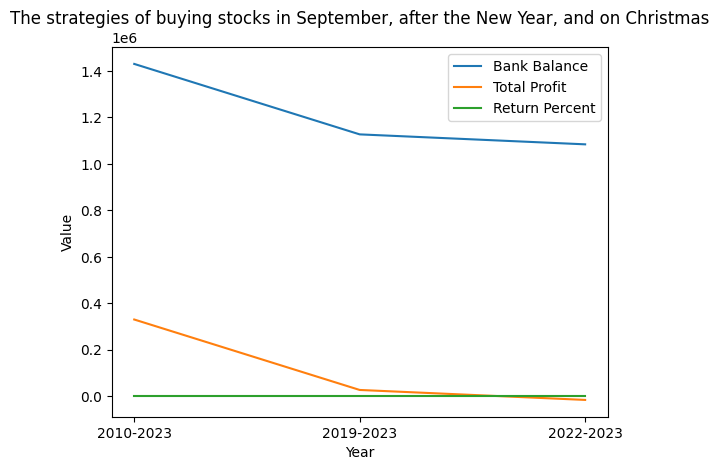

In [338]:
import pandas as pd
import matplotlib.pyplot as plt

# Strategy bumnber 1 :MACD with rebalancing between different sectors each year
macd_data = {'Year': ['2010-2023', '2019-2023', '2022-2023'],
             'Bank Balance': [1759974, 1534973, 1146531],
             'Total Profit': [659974, 434973, 46531],
             'Return Percent': [0.6, 0.4, 0.04]}
macd_df = pd.DataFrame(macd_data)

# Trend Strategy
trend_data = {'Year': ['2010-2023', '2019-2023', '2022-2023'],
              'Bank Balance': [2300160, 1334104, 1235846],
              'Total Profit': [1200160, 234104, 135846],
              'Return Percent': [1.09, 0.21, 0.123]}
trend_df = pd.DataFrame(trend_data)

# BollingerBands strategy
bb_data = {'Year': ['2010-2023', '2019-2023', '2022-2023'],
           'Bank Balance': [3100536, 1435098, 1125033],
           'Total Profit': [2000536, 335098, 25033],
           'Return Percent': [1.818, 0.3046, 0.022]}
bb_df = pd.DataFrame(bb_data)

# INFLATION STRATEGY
inf_data = {'Year': ['2010-2023', '2019-2023', '2022-2023'],
            'Bank Balance': [3834733, 1844775, 1166338.18],
            'Total Profit': [2734733, 744775, 66338],
            'Return Percent': [2.486, 0.677, 0.06]}
inf_df = pd.DataFrame(inf_data)

# The strategies of buying stocks in September, after the New Year, and on Christmas
buying_data = {'Year': ['2010-2023', '2019-2023', '2022-2023'],
               'Bank Balance': [1429570, 1126361, 1083474],
               'Total Profit': [329570, 26361, -16525],
               'Return Percent': [0.29, 0.02, -0.015]}
buying_df = pd.DataFrame(buying_data)

# Line chart for MACD strategy
fig, ax = plt.subplots()
ax.plot(macd_df['Year'], macd_df['Bank Balance'], label='Bank Balance')
ax.plot(macd_df['Year'], macd_df['Total Profit'], label='Total Profit')
ax.plot(macd_df['Year'], macd_df['Return Percent'], label='Return Percent')
ax.set_title('MACD with rebalancing between different sectors each year')
ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.legend()
plt.show()

# Line chart for Trend strategy
fig, ax = plt.subplots()
ax.plot(trend_df['Year'], trend_df['Bank Balance'], label='Bank Balance')
ax.plot(trend_df['Year'], trend_df['Total Profit'], label='Total Profit')
ax.plot(trend_df['Year'], trend_df['Return Percent'], label='Return Percent')
ax.set_title('Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(bb_data ['Year'], bb_data ['Bank Balance'], label='Bank Balance')
ax.plot(bb_data ['Year'], bb_data ['Total Profit'], label='Total Profit')
ax.plot(bb_data ['Year'], bb_data ['Return Percent'], label='Return Percent')
ax.set_title('BollingerBands strategy ')
ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(inf_data['Year'], inf_data['Bank Balance'], label='Bank Balance')
ax.plot(inf_data['Year'], inf_data['Total Profit'], label='Total Profit')
ax.plot(inf_data['Year'], inf_data['Return Percent'], label='Return Percent')
ax.set_title('INFLATION STRATEGY')
ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(buying_data['Year'], buying_data['Bank Balance'], label='Bank Balance')
ax.plot(buying_data['Year'], buying_data['Total Profit'], label='Total Profit')
ax.plot(buying_data['Year'], buying_data['Return Percent'], label='Return Percent')
ax.set_title('The strategies of buying stocks in September, after the New Year, and on Christmas')
ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.legend()
plt.show()


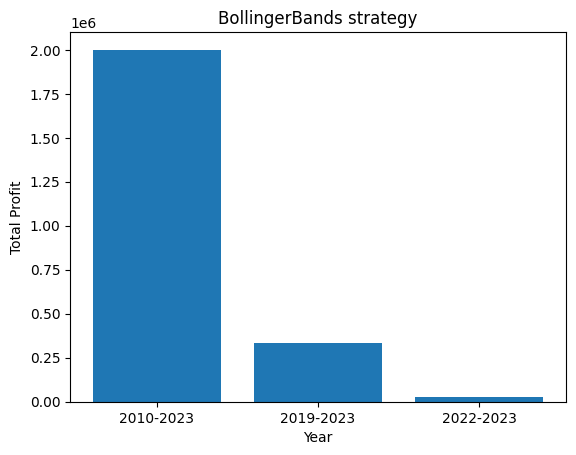

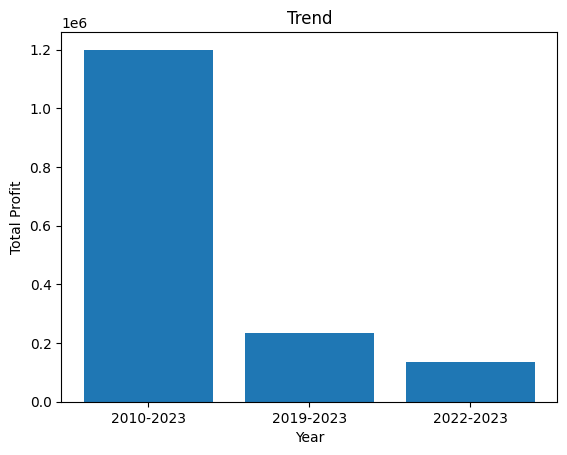

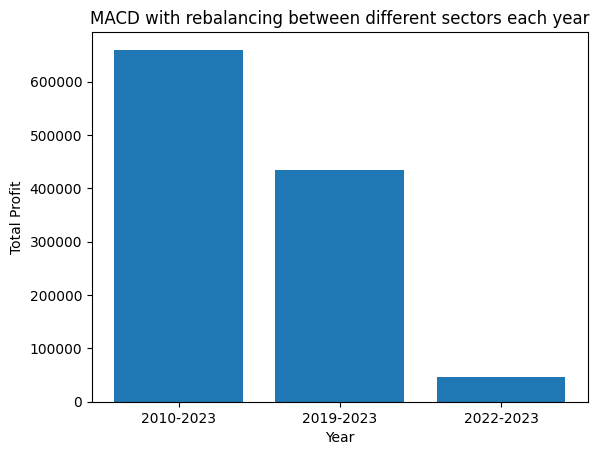

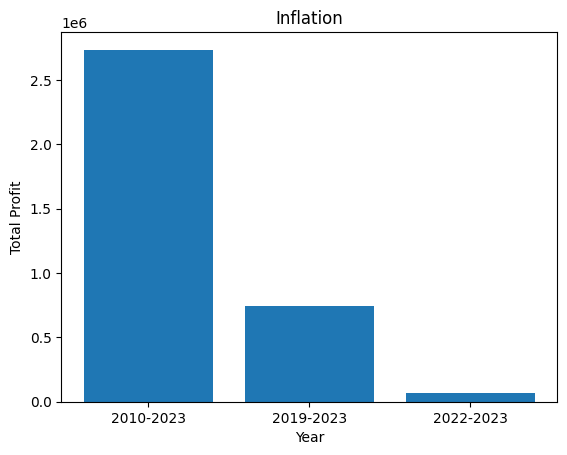

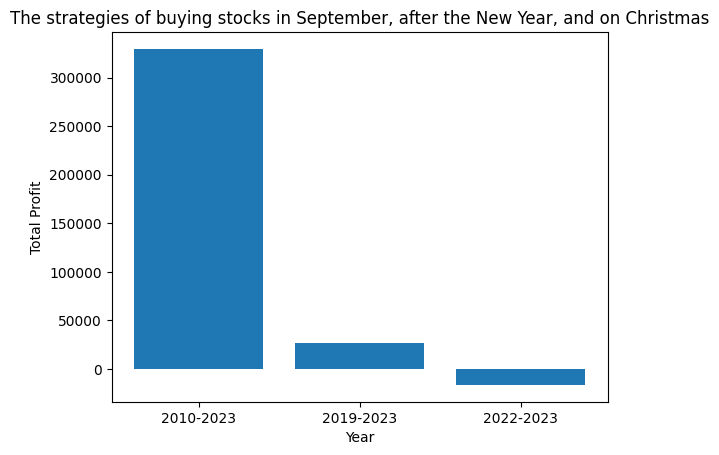

In [347]:
plt.bar(bb_df['Year'], bb_df['Total Profit'])
plt.title('BollingerBands strategy')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.show()

plt.bar(trend_df['Year'],trend_df['Total Profit'])
plt.title('Trend')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.show()

plt.bar(macd_df['Year'], macd_df['Total Profit'])
plt.title('MACD with rebalancing between different sectors each year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.show()

plt.bar(inf_data['Year'], inf_data['Total Profit'])
plt.title('Inflation')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.show()

plt.bar(buying_data['Year'], buying_data['Total Profit'])
plt.title('The strategies of buying stocks in September, after the New Year, and on Christmas')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.show()

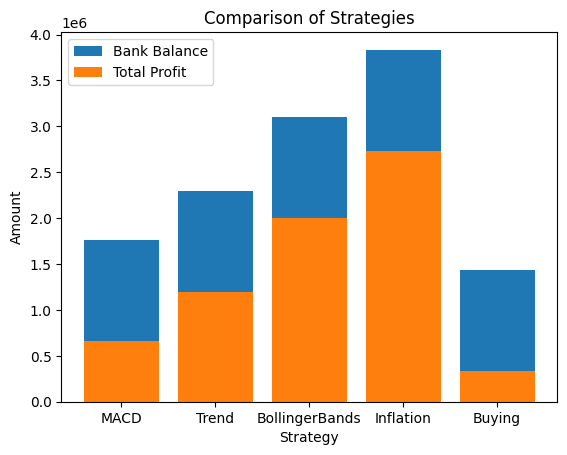

In [348]:
labels = ['MACD', 'Trend', 'BollingerBands', 'Inflation', 'Buying']
bank_balances = [macd_df['Bank Balance'][0], trend_df['Bank Balance'][0], bb_df['Bank Balance'][0], inf_df['Bank Balance'][0], buying_df['Bank Balance'][0]]
total_profits = [macd_df['Total Profit'][0], trend_df['Total Profit'][0], bb_df['Total Profit'][0], inf_df['Total Profit'][0], buying_df['Total Profit'][0]]

plt.bar(labels, bank_balances, label='Bank Balance')
plt.bar(labels, total_profits, label='Total Profit')
plt.title('Comparison of Strategies')
plt.xlabel('Strategy')
plt.ylabel('Amount')
plt.legend()
plt.show()


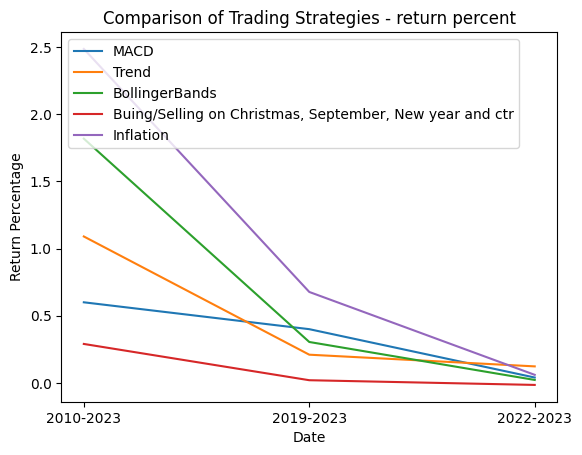

In [353]:
import matplotlib.pyplot as plt

# Set x-axis labels
xticks = [0, 1, 2]
xticklabels = ['2010-2023', '2019-2023', '2022-2023']

# Plot data
plt.plot(labels[:3], macd_df['Return Percent'], label='MACD')
plt.plot(labels[:3], trend_df['Return Percent'], label='Trend')
plt.plot(labels[:3], bb_df['Return Percent'], label='BollingerBands')
plt.plot(labels[:3], buying_df['Return Percent'], label='Buing/Selling on Christmas, September, New year and ctr')
plt.plot(labels[:3], inf_data['Return Percent'], label='Inflation')
plt.legend(loc="upper left")
plt.xlabel('Date')
plt.ylabel('Return Percentage')

# Set x-axis ticks and labels
plt.xticks(xticks, xticklabels)

plt.title('Comparison of Trading Strategies - return percent')
plt.show()


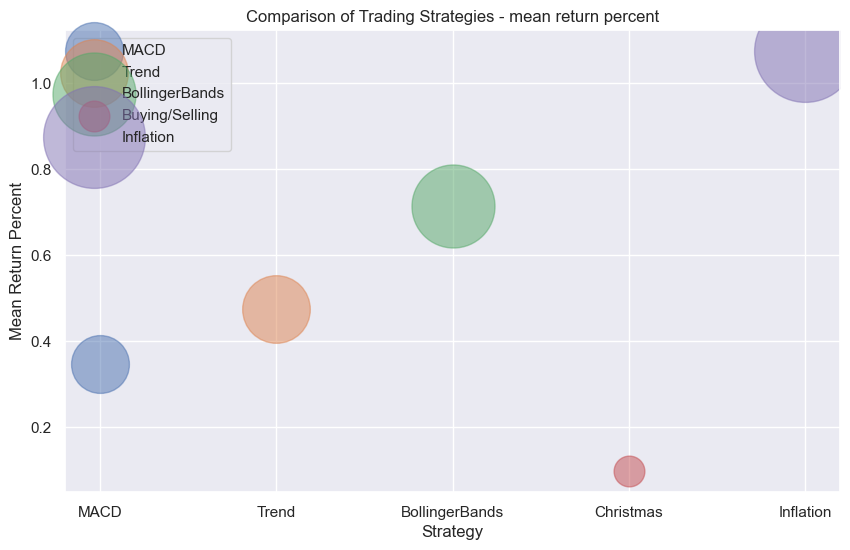

In [361]:
import matplotlib.pyplot as plt

# Calculate mean return percent for each strategy
macd_mean = macd_df['Return Percent'].mean()
trend_mean = trend_df['Return Percent'].mean()
bb_mean = bb_df['Return Percent'].mean()
buying_mean = buying_df['Return Percent'].mean()
inf_mean = inf_df['Return Percent'].mean()

# Create bubble chart
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter('MACD', macd_mean, s=macd_mean*5000, alpha=0.5, label='MACD')
ax.scatter('Trend', trend_mean, s=trend_mean*5000, alpha=0.5, label='Trend')
ax.scatter('BollingerBands', bb_mean, s=bb_mean*5000, alpha=0.5, label='BollingerBands')
ax.scatter('Christmas', buying_mean, s=buying_mean*5000, alpha=0.5, label='Buying/Selling')
ax.scatter('Inflation', inf_mean, s=inf_mean*5000, alpha=0.5, label='Inflation')

# Add labels and title
ax.set_xlabel('Strategy')
ax.set_ylabel('Mean Return Percent')
ax.set_title('Comparison of Trading Strategies - mean return percent')
ax.legend()

plt.show()



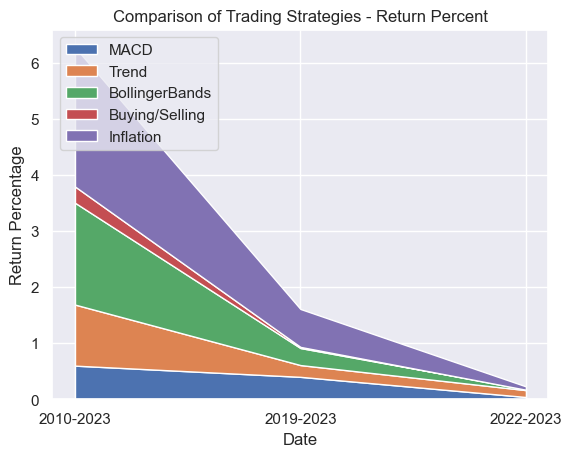

In [382]:
import matplotlib.pyplot as plt

# Combine the dataframes into a single dataframe
df = pd.concat([macd_df['Return Percent'], trend_df['Return Percent'], bb_df['Return Percent'], buying_df['Return Percent'], inf_df['Return Percent']], axis=1)
df.columns = ['MACD', 'Trend', 'BollingerBands', 'Buying/Selling', 'Inflation']

# Create a stacked area chart
plt.stackplot(labels[:3], df['MACD'], df['Trend'], df['BollingerBands'], df['Buying/Selling'], df['Inflation'], labels=df.columns)
plt.legend(loc='upper left')
# Set x-axis labels
xticks = [0, 1, 2]
xticklabels = ['2010-2023', '2019-2023', '2022-2023']
plt.xticks(xticks, xticklabels)
plt.xlabel('Date')
plt.ylabel('Return Percentage')
plt.title('Comparison of Trading Strategies - Return Percent')
plt.show()
